In [2]:
import random, gym, math
from gym import error, spaces
import pandas as pd
import numpy as np
from enum import Enum
from stockstats import StockDataFrame
# from tensorboardX import SummaryWriter

import gym

import tensorflow as tf
from stable_baselines.common.policies import MlpPolicy, CnnPolicy, MlpLstmPolicy, ActorCriticPolicy, LstmPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.common.evaluation import evaluate_policy
from stable_baselines import PPO2, PPO1, A2C, DQN, TD3, SAC, ACER

# from stable_baselines3.common.policies import MlpPolicy
# from stable_baselines3 import PPO
# from stable_baselines3.common.vec_env import DummyVecEnv
# from stable_baselines3.common.evaluation import evaluate_policy

from sklearn import preprocessing

import datetime
import backtrader as bt
import backtrader.indicators as bi
from backtrader.feeds import PandasData

import matplotlib.pyplot as plt

from backtrader_plotting import Bokeh
from backtrader_plotting.schemes import Tradimo, Blackly

In [3]:
from lutils.stock import LTdxHq

In [73]:
result = pd.read_pickle('d:/d.pkl')

In [74]:
result[y_kmeans==5]

NameError: name 'y_kmeans' is not defined

In [4]:
MAX_ACCOUNT_BALANCE = 2147483647
MAX_NUM_SHARES = 2147483647
MAX_NUM_AMOUNTS = 2147483647
MAX_SHARE_PRICE = 5000
MAX_OPEN_POSITIONS = 60
MAX_STEPS = 240 # 40000
NEXT_OBSERVATION_SIZE = 10

INITIAL_ACCOUNT_BALANCE = 10000

# writer = SummaryWriter('log')

In [5]:
# ltdxhq = LTdxHq()
# code = '603636' # 603828 603828 000032 300142 603636 600519
# # df = ltdxhq.get_k_data_1min(code, end='2021-09-02') # 000032 300142 603636 600519
# df = ltdxhq.get_k_data_daily(code, end='2021-01-01') # 000032 300142 603636 600519
# df = StockDataFrame(df.rename(columns={'vol': 'volume'}))
# # df['macd']
# # df['kdjk']
# # df['rsi_6']
# # df['rsi_12']

# # df_eval = ltdxhq.get_k_data_1min(code, start='2021-08-10')
# df_eval = ltdxhq.get_k_data_daily(code, start='2021-01-01')
# df_eval = StockDataFrame(df_eval.rename(columns={'vol': 'volume'}))

# ltdxhq.close()

In [6]:
# ltdxhq = LTdxHq()

# codes = ['603636', ] # '603828', '603828', '000032', '300142', '603636', '600519'
# dfs = []
# for code in codes:
#     _df = ltdxhq.get_k_data_daily(code, end='2021-01-01')
# #     _df = StockDataFrame(_df.rename(columns={'vol': 'volume'}))
#     _df = _df.rename(columns={'vol': 'volume'})
    
#     _df = _df.assign(open_normal = _df.open / _df.open.max())
#     _df = _df.assign(close_normal = _df.close / _df.close.max())
#     _df = _df.assign(high_normal = _df.high / _df.high.max())
#     _df = _df.assign(low_normal = _df.low / _df.low.max())
#     _df = _df.assign(volume_normal = _df.volume / _df.volume.max())
#     _df = _df.assign(amount_normal = _df.amount / _df.amount.max())
    
#     dfs.append(_df) # / _df.max())

# df = pd.concat(dfs)

# df_evals = []
# for code in codes:
#     _df = ltdxhq.get_k_data_daily(code, start='2021-01-01')
#     _df = _df.rename(columns={'vol': 'volume'})
    
#     _df = _df.assign(open_normal = _df.open / _df.open.max())
#     _df = _df.assign(close_normal = _df.close / _df.close.max())
#     _df = _df.assign(high_normal = _df.high / _df.high.max())
#     _df = _df.assign(low_normal = _df.low / _df.low.max())
#     _df = _df.assign(volume_normal = _df.volume / _df.volume.max())
#     _df = _df.assign(amount_normal = _df.amount / _df.amount.max())
    
#     df_evals.append(_df)
# ltdxhq.close()

In [75]:
ltdxhq = LTdxHq()

# codes = ['603636', '603828', '688698', '000032', '300142', '603636', ] # '600519'
codes = ['600603', '600583', '600582', '600565', '600558', '600551',
       '600509', '600503', '600488', '600469', '600439', '600433',
       '600428', '600425', '600387', '600383', '600382', '600369',
       '600339', '600337', '600335', '600326', '600320', '600312',]
dfs = []
df_evals = []
for code in codes:
    _df = ltdxhq.get_k_data_daily(code)
#     _df = StockDataFrame(_df.rename(columns={'vol': 'volume'}))
    _df = _df.rename(columns={'vol': 'volume'})
    
    _df = _df.assign(open_normal = _df.open / _df.open.max())
    _df = _df.assign(close_normal = _df.close / _df.close.max())
    _df = _df.assign(high_normal = _df.high / _df.high.max())
    _df = _df.assign(low_normal = _df.low / _df.low.max())
    _df = _df.assign(volume_normal = _df.volume / _df.volume.max())
    _df = _df.assign(amount_normal = _df.amount / _df.amount.max())
    
    dfs.append(_df.loc[:'2021-01-01']) # / _df.max())
    df_evals.append(_df.loc['2021-01-01':])
    
df = pd.concat(dfs)

ltdxhq.close()

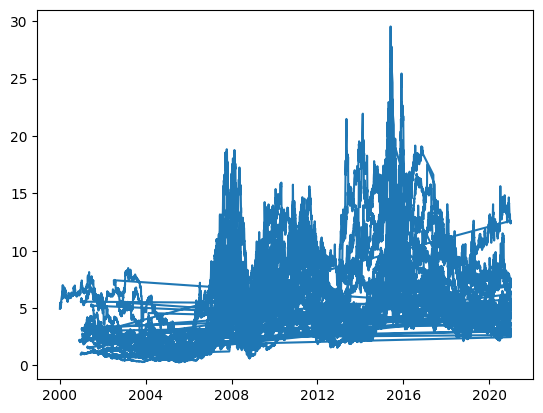

In [76]:
plt.plot(df.close)
plt.show()

In [77]:
df

,open,close,high,low,volume,amount,open_normal,close_normal,high_normal,low_normal,volume_normal,amount_normal
date,,,,,,,,,,,,
2000-01-04,4.78,4.94,4.95,4.77,1400800.0,19873510.0,0.469087,0.477756,0.455801,0.472277,0.014870,0.022972
2000-01-05,4.93,5.19,5.43,4.86,7043100.0,107845504.0,0.483808,0.501934,0.500000,0.481188,0.074764,0.124658
2000-01-06,5.13,5.35,5.37,5.07,2145300.0,32499732.0,0.503435,0.517408,0.494475,0.501980,0.022773,0.037566
2000-01-07,5.35,5.43,5.61,5.27,7018700.0,110908752.0,0.525025,0.525145,0.516575,0.521782,0.074505,0.128199
2000-01-10,5.44,5.48,5.60,5.33,5804700.0,92433640.0,0.533857,0.529981,0.515654,0.527723,0.061618,0.106843
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,7.59,7.63,7.77,7.42,31743726.0,243337920.0,0.309291,0.312449,0.309562,0.311111,0.172859,0.119463
2020-12-28,7.62,7.33,7.63,7.27,24414482.0,181208688.0,0.310513,0.300164,0.303984,0.304822,0.132948,0.088961
2020-12-29,7.28,7.06,7.34,7.05,20843088.0,149537488.0,0.296659,0.289107,0.292430,0.295597,0.113500,0.073413


In [78]:
class Actions(Enum):
    Hold = 0
    Sell = 1
    Buy = 2

In [79]:
ddd = []
class LStockDailyEnv(gym.Env):
    """A stock trading environment for OpenAI gym"""
    metadata = {'render.modes': ['human']}

    def __init__(self, df):
        super(LStockDailyEnv, self).__init__()

#         self.df = df / df.max()
#         self.max = df.max()
        self.df = df
        self.max = df.max()

        self.current_step = NEXT_OBSERVATION_SIZE

#         self.reward_range = (-np.inf, np.inf)
        self.reward_range = (-1, 1)

#         self.action_space = spaces.Box(low=np.array([0, 0]), high=np.array([3, 1]), dtype=np.float16)
        self.action_space = spaces.Discrete(len(Actions))
        
        self.observation_space = spaces.Box(low=-1, high=1, shape=(6, NEXT_OBSERVATION_SIZE + 1), dtype=np.float16)
#         self.min_max_scaler = preprocessing.MinMaxScaler()

    def _next_observation(self):
        # Get the stock data points for the last 5 days and scale to between 0-1
        frame = np.array([
            # self.df.iloc[self.current_step: self.current_step + NEXT_OBSERVATION_SIZE]['open'].values / MAX_SHARE_PRICE,
            # self.df.iloc[self.current_step: self.current_step + NEXT_OBSERVATION_SIZE]['high'].values / MAX_SHARE_PRICE,
            # self.df.iloc[self.current_step: self.current_step + NEXT_OBSERVATION_SIZE]['low'].values / MAX_SHARE_PRICE,
            # self.df.iloc[self.current_step: self.current_step + NEXT_OBSERVATION_SIZE]['close'].values / MAX_SHARE_PRICE,
            # self.df.iloc[self.current_step: self.current_step + NEXT_OBSERVATION_SIZE]['vol'].values / MAX_NUM_SHARES,

            # self.df['macd'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # self.df['macdh'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # self.df['macds'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # # self.df['volume_delta'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # # self.df['open_2_d'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # # self.df['open_-2_r'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # # self.df['cr'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # # self.df['cr-ma1'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # # self.df['cr-ma2'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # # self.df['cr-ma3'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # self.df['kdjk'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # self.df['kdjd'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # self.df['kdjj'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # self.df['open_2_sma'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # self.df['dma'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # self.df['pdi'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # self.df['mdi'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # self.df['dx'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # self.df['adx'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # self.df['adxr'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # # self.df['tema'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # # self.df['vr'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # # self.df['vr_6_sma'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,

#             self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['open'].values / MAX_SHARE_PRICE,
#             self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['high'].values / MAX_SHARE_PRICE,
#             self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['low'].values / MAX_SHARE_PRICE,
#             self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['close'].values / MAX_SHARE_PRICE,
#             self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['volume'].values / MAX_NUM_SHARES,
#             self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['amount'].values / MAX_NUM_SHARES,

#             self.df['macd'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
#             self.df['macdh'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
#             self.df['macds'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
#             self.df['kdjk'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
#             self.df['kdjd'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
#             self.df['kdjj'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,

#             self.df['rsi_6'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
#             self.df['rsi_12'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
            
            self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['open_normal'].values,
            self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['high_normal'].values,
            self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['low_normal'].values,
            self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['close_normal'].values,
            self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['volume_normal'].values,
            self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['amount_normal'].values,

        ])
        
        bal = np.ones([6, 1]) * self.balance / self.net_worth
#         act = np.ones([6, 1]) * action / 2
        
        frame = np.hstack([frame, bal, ]) # act
        
#         print(frame)
#         print('##########')
#         frame = self.min_max_scaler.fit_transform(frame)
# #         frame = pd.DataFrame(min_max_scaler.fit_transform(df), index=df.index, columns=df.columns)
# #         frame = self.scaler.fit_transform(frame)
#         print(frame)
#         print('*****************')
        
        return frame

    def _take_action(self, action):
        current_price = self.df.iloc[self.current_step]['close'] # + 0.02
        tomorrow_price = self.df.iloc[self.current_step + 1]['close'] # + 0.02
        
        if action == Actions.Buy.value:
            # Buy amount % of balance in shares
            total_possible = int(self.balance / current_price)
            shares_bought = int(total_possible / 100)
            prev_cost = self.cost_basis * self.shares_held
            additional_cost = shares_bought * current_price * 100

            self.balance -= additional_cost
            self.cost_basis = (prev_cost + additional_cost) / (self.shares_held + shares_bought)
            self.shares_held += shares_bought

        elif action == Actions.Sell.value:
            # Sell amount % of shares held
            shares_sold = int(self.shares_held)
            self.balance += shares_sold * current_price * 100
            self.shares_held -= shares_sold
            self.total_shares_sold += shares_sold
            self.total_sales_value += shares_sold * current_price

        self.net_worth = self.balance + self.shares_held * tomorrow_price * 100
        
#         print(self.balance, self.net_worth, self.shares_held, current_price)
        
        if self.net_worth > self.max_net_worth:
            self.max_net_worth = self.net_worth

        if self.shares_held == 0:
            self.cost_basis = 0
        
        
    def step(self, action):
        # Execute one time step within the environment
        shares_held = self.shares_held
        self._take_action(action)
        
        #  
        done =  (self.current_step + 1) >= self.df.shape[0] or self.net_worth <= INITIAL_ACCOUNT_BALANCE * .5 or self.df.index[self.current_step].weekday() == 4
        
        obs = self._next_observation()
        reward = 0
        
#         if not done:
# #             if action_type < 1: # Buy
# #                 reward = self.df.iloc[self.current_step + 1]['close'] - self.df.iloc[self.current_step]['close']
# #             elif action_type >= 1 and action_type < 2: # Sell
# #                 reward = self.df.iloc[self.current_step]['close'] - self.df.iloc[self.current_step + 1]['close']
# #             else: # Hold
# #                 reward = self.net_worth - self.old_net_worth # self.df.iloc[self.current_step + 1]['close'] - self.df.iloc[self.current_step]['close']
            
#             reward = self.df.iloc[self.current_step + 1]['close'] - self.df.iloc[self.current_step]['close']
#             if (self.shares_held <= 0 and reward > 0) or (self.shares_held > 0 and reward < 0):
#                 reward = -reward
            
#             if action == Actions.Buy.value: # buy
#                 if self.old_balance == self.balance:
#                     reward = reward * .5
#                 else:
#                     reward = reward
#             elif action == Actions.Sell.value: # sell
#                 if self.old_balance == self.balance:
#                     reward = reward * .5
#                 else:
#                     reward = reward
#             elif action == Actions.Hold.value and self.shares_held <= 0:
#                 reward = -np.abs(reward) # -(np.abs(reward) / self.df.iloc[self.current_step + 1]['close'])
            
# #             print(action, reward)
#             self.old_balance = self.balance
#         else:
# #             reward = (self.net_worth - INITIAL_ACCOUNT_BALANCE) / INITIAL_ACCOUNT_BALANCE
# #             print(self.balance, reward)
#             reward = self.net_worth - INITIAL_ACCOUNT_BALANCE
        
#         self.old_net_worth = self.net_worth
#         self.current_step = self.current_step + 1
        
        reward = (self.net_worth - INITIAL_ACCOUNT_BALANCE)
        
        ddd.append([self.net_worth, reward, action, self.current_step])
        
        self.current_step = self.current_step + 1
        return obs, reward, done, {'net_worth': self.net_worth}

    def reset(self):
        # Reset the state of the environment to an initial state
        self.balance = INITIAL_ACCOUNT_BALANCE
        self.old_balance = self.balance
        self.net_worth = INITIAL_ACCOUNT_BALANCE
        self.old_net_worth = self.net_worth
        self.max_net_worth = INITIAL_ACCOUNT_BALANCE
        self.shares_held = 0
        self.cost_basis = 0
        self.total_shares_sold = 0
        self.total_sales_value = 0

        if (self.current_step + 5) >= self.df.shape[0]:
            self.current_step = NEXT_OBSERVATION_SIZE
        else:
            self.current_step = self.current_step + 1

        return self._next_observation()

    def render(self, mode='human', close=False):
        # Render the environment to the screen
        profit = self.net_worth - INITIAL_ACCOUNT_BALANCE

        print(f'Step: {self.current_step}')
        print(f'Balance: {self.balance}')
        print(f'Shares held: {self.shares_held} (Total sold: {self.total_shares_sold})')
        print(f'Avg cost for held shares: {self.cost_basis} (Total sales value: {self.total_sales_value})')
        print(f'Net worth: {self.net_worth} (Max net worth: {self.max_net_worth})')
        print(f'Profit: {profit}')

In [80]:
# env = DummyVecEnv([lambda: LStockDailyEnv(df)])
# policy_kwargs = dict(net_arch=[128, 'lstm', dict(vf=[256, 256], pi=[256, 256])])

# model = A2C('MlpLstmPolicy', env, verbose=1, policy_kwargs=policy_kwargs)
# model.learn(total_timesteps=100000)
# # model.save('ppo_stock')

In [81]:
env = DummyVecEnv([lambda: LStockDailyEnv(df)])
# policy_kwargs = dict(act_fun=tf.nn.tanh, net_arch=[256, 256, 'lstm', 256, dict(pi=[128, 64, 32, 16], vf=[128, 128, 128])])
# model = A2C('MlpLstmPolicy', env, verbose=1, policy_kwargs=policy_kwargs)

policy_kwargs = dict(net_arch=[256, 256, 256, dict(pi=[128, 64, 32, 16], vf=[128, 128, 128])])
model = PPO2('MlpPolicy', env, verbose=1, policy_kwargs=policy_kwargs)

model.learn(total_timesteps=200000)
# model.save('ppo_stock')

---------------------------------------
| approxkl           | 1.0576484e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0.000125       |
| fps                | 323            |
| n_updates          | 1              |
| policy_entropy     | 1.0986022      |
| policy_loss        | -0.00010462827 |
| serial_timesteps   | 128            |
| time_elapsed       | 0              |
| total_timesteps    | 128            |
| value_loss         | 212997.89      |
---------------------------------------
--------------------------------------
| approxkl           | 6.0905677e-07 |
| clipfrac           | 0.0           |
| explained_variance | 4.62e-05      |
| fps                | 820           |
| n_updates          | 2             |
| policy_entropy     | 1.0986025     |
| policy_loss        | 4.4437824e-05 |
| serial_timesteps   | 256           |
| time_elapsed       | 0.396         |
| total_timesteps    | 256           |
| value_loss         | 82117.87      |
------------

--------------------------------------
| approxkl           | 2.9759472e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.000132      |
| fps                | 853           |
| n_updates          | 16            |
| policy_entropy     | 1.0980746     |
| policy_loss        | -4.534563e-05 |
| serial_timesteps   | 2048          |
| time_elapsed       | 2.53          |
| total_timesteps    | 2048          |
| value_loss         | 125105.44     |
--------------------------------------
--------------------------------------
| approxkl           | 1.9418987e-06 |
| clipfrac           | 0.0           |
| explained_variance | 3.59e-05      |
| fps                | 825           |
| n_updates          | 17            |
| policy_entropy     | 1.0979393     |
| policy_loss        | 0.00013498473 |
| serial_timesteps   | 2176          |
| time_elapsed       | 2.68          |
| total_timesteps    | 2176          |
| value_loss         | 128159.445    |
-------------------------

---------------------------------------
| approxkl           | 3.1739623e-06  |
| clipfrac           | 0.0            |
| explained_variance | -1.05e-05      |
| fps                | 836            |
| n_updates          | 32             |
| policy_entropy     | 1.0976156      |
| policy_loss        | -2.5492627e-05 |
| serial_timesteps   | 4096           |
| time_elapsed       | 4.95           |
| total_timesteps    | 4096           |
| value_loss         | 51060.42       |
---------------------------------------
---------------------------------------
| approxkl           | 1.667966e-05   |
| clipfrac           | 0.0            |
| explained_variance | -1.37e-05      |
| fps                | 836            |
| n_updates          | 33             |
| policy_entropy     | 1.0976359      |
| policy_loss        | -0.00035838527 |
| serial_timesteps   | 4224           |
| time_elapsed       | 5.1            |
| total_timesteps    | 4224           |
| value_loss         | 114925.586     |


--------------------------------------
| approxkl           | 7.5098765e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.000207     |
| fps                | 836           |
| n_updates          | 48            |
| policy_entropy     | 1.0965395     |
| policy_loss        | 0.00014625094 |
| serial_timesteps   | 6144          |
| time_elapsed       | 7.39          |
| total_timesteps    | 6144          |
| value_loss         | 73064.97      |
--------------------------------------
--------------------------------------
| approxkl           | 1.683948e-07  |
| clipfrac           | 0.0           |
| explained_variance | 4.3e-05       |
| fps                | 853           |
| n_updates          | 49            |
| policy_entropy     | 1.0966009     |
| policy_loss        | 4.7668756e-05 |
| serial_timesteps   | 6272          |
| time_elapsed       | 7.55          |
| total_timesteps    | 6272          |
| value_loss         | 906244.06     |
-------------------------

---------------------------------------
| approxkl           | 1.27125195e-05 |
| clipfrac           | 0.0            |
| explained_variance | 0.000148       |
| fps                | 858            |
| n_updates          | 64             |
| policy_entropy     | 1.0981762      |
| policy_loss        | -0.0003311977  |
| serial_timesteps   | 8192           |
| time_elapsed       | 9.81           |
| total_timesteps    | 8192           |
| value_loss         | 454534.34      |
---------------------------------------
--------------------------------------
| approxkl           | 1.6581087e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.000149      |
| fps                | 864           |
| n_updates          | 65            |
| policy_entropy     | 1.0976324     |
| policy_loss        | 2.0756735e-05 |
| serial_timesteps   | 8320          |
| time_elapsed       | 9.96          |
| total_timesteps    | 8320          |
| value_loss         | 5986485.5     |
------------

--------------------------------------
| approxkl           | 2.4426454e-06 |
| clipfrac           | 0.0           |
| explained_variance | 1.25e-06      |
| fps                | 841           |
| n_updates          | 81            |
| policy_entropy     | 1.0977702     |
| policy_loss        | -0.0002219096 |
| serial_timesteps   | 10368         |
| time_elapsed       | 12.4          |
| total_timesteps    | 10368         |
| value_loss         | 75444.65      |
--------------------------------------
---------------------------------------
| approxkl           | 1.0471306e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.000218       |
| fps                | 836            |
| n_updates          | 82             |
| policy_entropy     | 1.097445       |
| policy_loss        | -0.00043784932 |
| serial_timesteps   | 10496          |
| time_elapsed       | 12.5           |
| total_timesteps    | 10496          |
| value_loss         | 53507.83       |
-------------

---------------------------------------
| approxkl           | 3.6384572e-06  |
| clipfrac           | 0.0            |
| explained_variance | -0.000224      |
| fps                | 815            |
| n_updates          | 97             |
| policy_entropy     | 1.0971972      |
| policy_loss        | -0.00027379917 |
| serial_timesteps   | 12416          |
| time_elapsed       | 14.8           |
| total_timesteps    | 12416          |
| value_loss         | 299468.1       |
---------------------------------------
---------------------------------------
| approxkl           | 1.4884199e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.00104        |
| fps                | 815            |
| n_updates          | 98             |
| policy_entropy     | 1.097045       |
| policy_loss        | -0.00092882966 |
| serial_timesteps   | 12544          |
| time_elapsed       | 15             |
| total_timesteps    | 12544          |
| value_loss         | 64709.57       |


---------------------------------------
| approxkl           | 3.8957132e-06  |
| clipfrac           | 0.0            |
| explained_variance | -0.000377      |
| fps                | 830            |
| n_updates          | 113            |
| policy_entropy     | 1.0969589      |
| policy_loss        | -8.7672146e-05 |
| serial_timesteps   | 14464          |
| time_elapsed       | 17.3           |
| total_timesteps    | 14464          |
| value_loss         | 204024.38      |
---------------------------------------
--------------------------------------
| approxkl           | 3.8863113e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.000207     |
| fps                | 825           |
| n_updates          | 114           |
| policy_entropy     | 1.0972316     |
| policy_loss        | 0.0002853988  |
| serial_timesteps   | 14592         |
| time_elapsed       | 17.4          |
| total_timesteps    | 14592         |
| value_loss         | 83996.2       |
------------

--------------------------------------
| approxkl           | 4.066339e-06  |
| clipfrac           | 0.0           |
| explained_variance | 3.79e-05      |
| fps                | 825           |
| n_updates          | 130           |
| policy_entropy     | 1.0937755     |
| policy_loss        | -6.128568e-05 |
| serial_timesteps   | 16640         |
| time_elapsed       | 19.8          |
| total_timesteps    | 16640         |
| value_loss         | 139152.83     |
--------------------------------------
---------------------------------------
| approxkl           | 1.0116413e-05  |
| clipfrac           | 0.0            |
| explained_variance | -0.00114       |
| fps                | 847            |
| n_updates          | 131            |
| policy_entropy     | 1.0929451      |
| policy_loss        | -0.00084246974 |
| serial_timesteps   | 16768          |
| time_elapsed       | 20             |
| total_timesteps    | 16768          |
| value_loss         | 160969.16      |
-------------

--------------------------------------
| approxkl           | 2.3241118e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.000559     |
| fps                | 864           |
| n_updates          | 147           |
| policy_entropy     | 1.093353      |
| policy_loss        | -8.568843e-05 |
| serial_timesteps   | 18816         |
| time_elapsed       | 22.4          |
| total_timesteps    | 18816         |
| value_loss         | 154015.66     |
--------------------------------------
---------------------------------------
| approxkl           | 1.1833447e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.00043        |
| fps                | 855            |
| n_updates          | 148            |
| policy_entropy     | 1.092397       |
| policy_loss        | -0.00022879068 |
| serial_timesteps   | 18944          |
| time_elapsed       | 22.6           |
| total_timesteps    | 18944          |
| value_loss         | 279715.8       |
-------------

--------------------------------------
| approxkl           | 2.5592466e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00251       |
| fps                | 836           |
| n_updates          | 164           |
| policy_entropy     | 1.0939271     |
| policy_loss        | 4.5777648e-05 |
| serial_timesteps   | 20992         |
| time_elapsed       | 25            |
| total_timesteps    | 20992         |
| value_loss         | 62051.945     |
--------------------------------------
--------------------------------------
| approxkl           | 6.0185957e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.00186      |
| fps                | 834           |
| n_updates          | 165           |
| policy_entropy     | 1.0945864     |
| policy_loss        | 7.614191e-05  |
| serial_timesteps   | 21120         |
| time_elapsed       | 25.2          |
| total_timesteps    | 21120         |
| value_loss         | 41434.234     |
-------------------------

--------------------------------------
| approxkl           | 1.1304719e-05 |
| clipfrac           | 0.0           |
| explained_variance | 3.61e-05      |
| fps                | 757           |
| n_updates          | 181           |
| policy_entropy     | 1.095288      |
| policy_loss        | -0.0001346069 |
| serial_timesteps   | 23168         |
| time_elapsed       | 27.7          |
| total_timesteps    | 23168         |
| value_loss         | 314347.0      |
--------------------------------------
---------------------------------------
| approxkl           | 2.247411e-05   |
| clipfrac           | 0.0            |
| explained_variance | 0.000216       |
| fps                | 836            |
| n_updates          | 182            |
| policy_entropy     | 1.096342       |
| policy_loss        | -0.00093890575 |
| serial_timesteps   | 23296          |
| time_elapsed       | 27.8           |
| total_timesteps    | 23296          |
| value_loss         | 182359.52      |
-------------

--------------------------------------
| approxkl           | 2.4473404e-05 |
| clipfrac           | 0.0           |
| explained_variance | -1.43e-05     |
| fps                | 858           |
| n_updates          | 198           |
| policy_entropy     | 1.08909       |
| policy_loss        | -0.0009608129 |
| serial_timesteps   | 25344         |
| time_elapsed       | 30.3          |
| total_timesteps    | 25344         |
| value_loss         | 298587.44     |
--------------------------------------
--------------------------------------
| approxkl           | 3.9320475e-05 |
| clipfrac           | 0.0           |
| explained_variance | 1.6e-05       |
| fps                | 833           |
| n_updates          | 199           |
| policy_entropy     | 1.0873973     |
| policy_loss        | -0.0010394049 |
| serial_timesteps   | 25472         |
| time_elapsed       | 30.4          |
| total_timesteps    | 25472         |
| value_loss         | 633271.1      |
-------------------------

--------------------------------------
| approxkl           | 0.00026724613 |
| clipfrac           | 0.0           |
| explained_variance | 0.00104       |
| fps                | 855           |
| n_updates          | 215           |
| policy_entropy     | 1.0941514     |
| policy_loss        | -0.0025072466 |
| serial_timesteps   | 27520         |
| time_elapsed       | 32.8          |
| total_timesteps    | 27520         |
| value_loss         | 176029.77     |
--------------------------------------
---------------------------------------
| approxkl           | 7.06439e-05    |
| clipfrac           | 0.0            |
| explained_variance | 0.000762       |
| fps                | 864            |
| n_updates          | 216            |
| policy_entropy     | 1.0873218      |
| policy_loss        | -0.00027321256 |
| serial_timesteps   | 27648          |
| time_elapsed       | 33             |
| total_timesteps    | 27648          |
| value_loss         | 164424.78      |
-------------

--------------------------------------
| approxkl           | 7.2048315e-05 |
| clipfrac           | 0.0           |
| explained_variance | -1.08e-05     |
| fps                | 847           |
| n_updates          | 231           |
| policy_entropy     | 1.0959756     |
| policy_loss        | 0.0010299508  |
| serial_timesteps   | 29568         |
| time_elapsed       | 35.2          |
| total_timesteps    | 29568         |
| value_loss         | 1953891.6     |
--------------------------------------
---------------------------------------
| approxkl           | 2.80773e-06    |
| clipfrac           | 0.0            |
| explained_variance | -0.000364      |
| fps                | 882            |
| n_updates          | 232            |
| policy_entropy     | 1.0884267      |
| policy_loss        | -2.3122062e-05 |
| serial_timesteps   | 29696          |
| time_elapsed       | 35.4           |
| total_timesteps    | 29696          |
| value_loss         | 592006.1       |
-------------

--------------------------------------
| approxkl           | 2.0206207e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00173       |
| fps                | 870           |
| n_updates          | 248           |
| policy_entropy     | 1.0838771     |
| policy_loss        | -0.0001932648 |
| serial_timesteps   | 31744         |
| time_elapsed       | 37.8          |
| total_timesteps    | 31744         |
| value_loss         | 196436.77     |
--------------------------------------
---------------------------------------
| approxkl           | 4.114215e-05   |
| clipfrac           | 0.0            |
| explained_variance | 0.00209        |
| fps                | 858            |
| n_updates          | 249            |
| policy_entropy     | 1.086588       |
| policy_loss        | -0.00014069711 |
| serial_timesteps   | 31872          |
| time_elapsed       | 38             |
| total_timesteps    | 31872          |
| value_loss         | 108446.09      |
-------------

--------------------------------------
| approxkl           | 4.2100924e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00268       |
| fps                | 858           |
| n_updates          | 265           |
| policy_entropy     | 1.0705172     |
| policy_loss        | 0.00033387472 |
| serial_timesteps   | 33920         |
| time_elapsed       | 40.4          |
| total_timesteps    | 33920         |
| value_loss         | 69755.59      |
--------------------------------------
--------------------------------------
| approxkl           | 9.4119234e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00135       |
| fps                | 853           |
| n_updates          | 266           |
| policy_entropy     | 1.0713313     |
| policy_loss        | -0.0023436013 |
| serial_timesteps   | 34048         |
| time_elapsed       | 40.6          |
| total_timesteps    | 34048         |
| value_loss         | 45179.254     |
-------------------------

--------------------------------------
| approxkl           | 0.00021534029 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 841           |
| n_updates          | 282           |
| policy_entropy     | 1.0301985     |
| policy_loss        | -0.0010480944 |
| serial_timesteps   | 36096         |
| time_elapsed       | 43            |
| total_timesteps    | 36096         |
| value_loss         | 520568.94     |
--------------------------------------
---------------------------------------
| approxkl           | 0.00010162805  |
| clipfrac           | 0.0            |
| explained_variance | 0.000712       |
| fps                | 870            |
| n_updates          | 283            |
| policy_entropy     | 1.0419618      |
| policy_loss        | -0.00060581684 |
| serial_timesteps   | 36224          |
| time_elapsed       | 43.2           |
| total_timesteps    | 36224          |
| value_loss         | 170801.34      |
-------------

--------------------------------------
| approxkl           | 3.3851754e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.00302       |
| fps                | 864           |
| n_updates          | 299           |
| policy_entropy     | 1.0752318     |
| policy_loss        | 1.917826e-06  |
| serial_timesteps   | 38272         |
| time_elapsed       | 45.6          |
| total_timesteps    | 38272         |
| value_loss         | 84189.69      |
--------------------------------------
--------------------------------------
| approxkl           | 2.0807885e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.000461      |
| fps                | 870           |
| n_updates          | 300           |
| policy_entropy     | 1.0774598     |
| policy_loss        | -0.0006410255 |
| serial_timesteps   | 38400         |
| time_elapsed       | 45.7          |
| total_timesteps    | 38400         |
| value_loss         | 67833.25      |
-------------------------

--------------------------------------
| approxkl           | 0.00057442824 |
| clipfrac           | 0.001953125   |
| explained_variance | 0.0015        |
| fps                | 853           |
| n_updates          | 315           |
| policy_entropy     | 1.0788252     |
| policy_loss        | -0.0039103134 |
| serial_timesteps   | 40320         |
| time_elapsed       | 48            |
| total_timesteps    | 40320         |
| value_loss         | 687312.25     |
--------------------------------------
--------------------------------------
| approxkl           | 3.2164335e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.000574      |
| fps                | 847           |
| n_updates          | 316           |
| policy_entropy     | 1.0781741     |
| policy_loss        | -0.0005023242 |
| serial_timesteps   | 40448         |
| time_elapsed       | 48.2          |
| total_timesteps    | 40448         |
| value_loss         | 152045.02     |
-------------------------

---------------------------------------
| approxkl           | 1.4524843e-05  |
| clipfrac           | 0.0            |
| explained_variance | -0.00181       |
| fps                | 820            |
| n_updates          | 332            |
| policy_entropy     | 1.090652       |
| policy_loss        | -0.00014657271 |
| serial_timesteps   | 42496          |
| time_elapsed       | 50.6           |
| total_timesteps    | 42496          |
| value_loss         | 64291.16       |
---------------------------------------
---------------------------------------
| approxkl           | 1.7891905e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0.00205        |
| fps                | 815            |
| n_updates          | 333            |
| policy_entropy     | 1.0817502      |
| policy_loss        | -0.00017273298 |
| serial_timesteps   | 42624          |
| time_elapsed       | 50.8           |
| total_timesteps    | 42624          |
| value_loss         | 427717.12      |


---------------------------------------
| approxkl           | 5.6669337e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0.000984       |
| fps                | 815            |
| n_updates          | 349            |
| policy_entropy     | 1.0886894      |
| policy_loss        | -0.00014663022 |
| serial_timesteps   | 44672          |
| time_elapsed       | 53.6           |
| total_timesteps    | 44672          |
| value_loss         | 163192.25      |
---------------------------------------
-------------------------------------
| approxkl           | 7.009534e-05 |
| clipfrac           | 0.0          |
| explained_variance | 0.00155      |
| fps                | 825          |
| n_updates          | 350          |
| policy_entropy     | 1.0949298    |
| policy_loss        | -0.001579425 |
| serial_timesteps   | 44800        |
| time_elapsed       | 53.8         |
| total_timesteps    | 44800        |
| value_loss         | 182763.53    |
------------------------

--------------------------------------
| approxkl           | 1.4758456e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.000342      |
| fps                | 775           |
| n_updates          | 366           |
| policy_entropy     | 1.0881046     |
| policy_loss        | -5.08246e-05  |
| serial_timesteps   | 46848         |
| time_elapsed       | 56.3          |
| total_timesteps    | 46848         |
| value_loss         | 421692.84     |
--------------------------------------
--------------------------------------
| approxkl           | 1.8514418e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.0025        |
| fps                | 718           |
| n_updates          | 367           |
| policy_entropy     | 1.0891218     |
| policy_loss        | 1.3807556e-05 |
| serial_timesteps   | 46976         |
| time_elapsed       | 56.4          |
| total_timesteps    | 46976         |
| value_loss         | 138749.16     |
-------------------------

--------------------------------------
| approxkl           | 7.460256e-05  |
| clipfrac           | 0.0           |
| explained_variance | -3.12e-05     |
| fps                | 830           |
| n_updates          | 382           |
| policy_entropy     | 1.0927898     |
| policy_loss        | -0.0014825808 |
| serial_timesteps   | 48896         |
| time_elapsed       | 59.5          |
| total_timesteps    | 48896         |
| value_loss         | 157021.72     |
--------------------------------------
---------------------------------------
| approxkl           | 9.951311e-05   |
| clipfrac           | 0.0            |
| explained_variance | 0.00036        |
| fps                | 759            |
| n_updates          | 383            |
| policy_entropy     | 1.091812       |
| policy_loss        | -0.00070844614 |
| serial_timesteps   | 49024          |
| time_elapsed       | 59.6           |
| total_timesteps    | 49024          |
| value_loss         | 663704.6       |
-------------

---------------------------------------
| approxkl           | 5.354421e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0.000245       |
| fps                | 820            |
| n_updates          | 399            |
| policy_entropy     | 1.0889044      |
| policy_loss        | -0.00019649672 |
| serial_timesteps   | 51072          |
| time_elapsed       | 62.4           |
| total_timesteps    | 51072          |
| value_loss         | 50060.645      |
---------------------------------------
--------------------------------------
| approxkl           | 2.7245118e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00255       |
| fps                | 809           |
| n_updates          | 400           |
| policy_entropy     | 1.0930202     |
| policy_loss        | 8.4723346e-05 |
| serial_timesteps   | 51200         |
| time_elapsed       | 62.5          |
| total_timesteps    | 51200         |
| value_loss         | 239776.64     |
------------

--------------------------------------
| approxkl           | 1.3671768e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.000334     |
| fps                | 820           |
| n_updates          | 416           |
| policy_entropy     | 1.0758418     |
| policy_loss        | 6.8398775e-05 |
| serial_timesteps   | 53248         |
| time_elapsed       | 65            |
| total_timesteps    | 53248         |
| value_loss         | 473330.38     |
--------------------------------------
---------------------------------------
| approxkl           | 0.000108516906 |
| clipfrac           | 0.0            |
| explained_variance | 0.00114        |
| fps                | 841            |
| n_updates          | 417            |
| policy_entropy     | 1.0876981      |
| policy_loss        | -0.002165056   |
| serial_timesteps   | 53376          |
| time_elapsed       | 65.2           |
| total_timesteps    | 53376          |
| value_loss         | 220459.8       |
-------------

---------------------------------------
| approxkl           | 3.6615784e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.016          |
| fps                | 841            |
| n_updates          | 433            |
| policy_entropy     | 1.0677041      |
| policy_loss        | -0.00069111923 |
| serial_timesteps   | 55424          |
| time_elapsed       | 67.7           |
| total_timesteps    | 55424          |
| value_loss         | 32706.639      |
---------------------------------------
-------------------------------------
| approxkl           | 4.787533e-05 |
| clipfrac           | 0.0          |
| explained_variance | -9.56e-05    |
| fps                | 841          |
| n_updates          | 434          |
| policy_entropy     | 1.0710607    |
| policy_loss        | 0.0002357642 |
| serial_timesteps   | 55552        |
| time_elapsed       | 67.8         |
| total_timesteps    | 55552        |
| value_loss         | 160400.22    |
------------------------

---------------------------------------
| approxkl           | 2.9160712e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.00308        |
| fps                | 825            |
| n_updates          | 450            |
| policy_entropy     | 1.0818093      |
| policy_loss        | -0.00031904585 |
| serial_timesteps   | 57600          |
| time_elapsed       | 70.3           |
| total_timesteps    | 57600          |
| value_loss         | 401922.75      |
---------------------------------------
--------------------------------------
| approxkl           | 0.00030899758 |
| clipfrac           | 0.0           |
| explained_variance | -0.00224      |
| fps                | 825           |
| n_updates          | 451           |
| policy_entropy     | 1.0815109     |
| policy_loss        | -0.0016365563 |
| serial_timesteps   | 57728         |
| time_elapsed       | 70.5          |
| total_timesteps    | 57728         |
| value_loss         | 153666.05     |
------------

---------------------------------------
| approxkl           | 1.3878433e-05  |
| clipfrac           | 0.0            |
| explained_variance | 7.39e-06       |
| fps                | 853            |
| n_updates          | 467            |
| policy_entropy     | 1.0754058      |
| policy_loss        | -0.00025025406 |
| serial_timesteps   | 59776          |
| time_elapsed       | 72.9           |
| total_timesteps    | 59776          |
| value_loss         | 631896.06      |
---------------------------------------
--------------------------------------
| approxkl           | 3.043182e-05  |
| clipfrac           | 0.0           |
| explained_variance | 2.74e-06      |
| fps                | 847           |
| n_updates          | 468           |
| policy_entropy     | 1.0780313     |
| policy_loss        | -0.0002439561 |
| serial_timesteps   | 59904         |
| time_elapsed       | 73.1          |
| total_timesteps    | 59904         |
| value_loss         | 619322.25     |
------------

--------------------------------------
| approxkl           | 0.00019221834 |
| clipfrac           | 0.0           |
| explained_variance | -0.00638      |
| fps                | 847           |
| n_updates          | 484           |
| policy_entropy     | 1.094251      |
| policy_loss        | 8.023367e-05  |
| serial_timesteps   | 61952         |
| time_elapsed       | 75.5          |
| total_timesteps    | 61952         |
| value_loss         | 26944.812     |
--------------------------------------
--------------------------------------
| approxkl           | 4.5524146e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.0049       |
| fps                | 825           |
| n_updates          | 485           |
| policy_entropy     | 1.0852618     |
| policy_loss        | 1.9748695e-06 |
| serial_timesteps   | 62080         |
| time_elapsed       | 75.7          |
| total_timesteps    | 62080         |
| value_loss         | 54144.0       |
-------------------------

--------------------------------------
| approxkl           | 0.00010273135 |
| clipfrac           | 0.0           |
| explained_variance | 0.00329       |
| fps                | 809           |
| n_updates          | 500           |
| policy_entropy     | 1.0956436     |
| policy_loss        | 0.00048870593 |
| serial_timesteps   | 64000         |
| time_elapsed       | 78            |
| total_timesteps    | 64000         |
| value_loss         | 456204.2      |
--------------------------------------
--------------------------------------
| approxkl           | 3.3898235e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.00357      |
| fps                | 815           |
| n_updates          | 501           |
| policy_entropy     | 1.0933595     |
| policy_loss        | 0.00038677396 |
| serial_timesteps   | 64128         |
| time_elapsed       | 78.1          |
| total_timesteps    | 64128         |
| value_loss         | 820080.0      |
-------------------------

--------------------------------------
| approxkl           | 2.4196156e-06 |
| clipfrac           | 0.0           |
| explained_variance | 0.000698      |
| fps                | 825           |
| n_updates          | 516           |
| policy_entropy     | 1.0861958     |
| policy_loss        | 2.3804605e-06 |
| serial_timesteps   | 66048         |
| time_elapsed       | 80.5          |
| total_timesteps    | 66048         |
| value_loss         | 431591.56     |
--------------------------------------
---------------------------------------
| approxkl           | 1.4072718e-06  |
| clipfrac           | 0.0            |
| explained_variance | 9.51e-05       |
| fps                | 836            |
| n_updates          | 517            |
| policy_entropy     | 1.0840583      |
| policy_loss        | -0.00010686647 |
| serial_timesteps   | 66176          |
| time_elapsed       | 80.6           |
| total_timesteps    | 66176          |
| value_loss         | 208174.27      |
-------------

---------------------------------------
| approxkl           | 2.3954704e-05  |
| clipfrac           | 0.0            |
| explained_variance | -0.00064       |
| fps                | 761            |
| n_updates          | 533            |
| policy_entropy     | 1.0911057      |
| policy_loss        | -0.00029688323 |
| serial_timesteps   | 68224          |
| time_elapsed       | 83.2           |
| total_timesteps    | 68224          |
| value_loss         | 411635.44      |
---------------------------------------
--------------------------------------
| approxkl           | 6.382104e-06  |
| clipfrac           | 0.0           |
| explained_variance | 0.00559       |
| fps                | 727           |
| n_updates          | 534           |
| policy_entropy     | 1.094624      |
| policy_loss        | -0.0002907978 |
| serial_timesteps   | 68352         |
| time_elapsed       | 83.4          |
| total_timesteps    | 68352         |
| value_loss         | 116449.42     |
------------

--------------------------------------
| approxkl           | 1.0979869e-05 |
| clipfrac           | 0.0           |
| explained_variance | 9.06e-06      |
| fps                | 830           |
| n_updates          | 550           |
| policy_entropy     | 1.0544199     |
| policy_loss        | -7.768301e-05 |
| serial_timesteps   | 70400         |
| time_elapsed       | 85.9          |
| total_timesteps    | 70400         |
| value_loss         | 277126.7      |
--------------------------------------
---------------------------------------
| approxkl           | 1.6069838e-05  |
| clipfrac           | 0.0            |
| explained_variance | 2.92e-06       |
| fps                | 847            |
| n_updates          | 551            |
| policy_entropy     | 1.055542       |
| policy_loss        | -3.3631455e-05 |
| serial_timesteps   | 70528          |
| time_elapsed       | 86.1           |
| total_timesteps    | 70528          |
| value_loss         | 107678.24      |
-------------

---------------------------------------
| approxkl           | 9.7338954e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.00273        |
| fps                | 836            |
| n_updates          | 567            |
| policy_entropy     | 1.0604519      |
| policy_loss        | -0.00052653917 |
| serial_timesteps   | 72576          |
| time_elapsed       | 88.6           |
| total_timesteps    | 72576          |
| value_loss         | 296671.75      |
---------------------------------------
--------------------------------------
| approxkl           | 0.00012698837 |
| clipfrac           | 0.0           |
| explained_variance | 0.000457      |
| fps                | 820           |
| n_updates          | 568           |
| policy_entropy     | 1.0675247     |
| policy_loss        | 0.00018371642 |
| serial_timesteps   | 72704         |
| time_elapsed       | 88.7          |
| total_timesteps    | 72704         |
| value_loss         | 139675.12     |
------------

--------------------------------------
| approxkl           | 3.7009224e-05 |
| clipfrac           | 0.0           |
| explained_variance | -7.15e-07     |
| fps                | 876           |
| n_updates          | 584           |
| policy_entropy     | 1.0585864     |
| policy_loss        | 2.1515414e-05 |
| serial_timesteps   | 74752         |
| time_elapsed       | 91.2          |
| total_timesteps    | 74752         |
| value_loss         | 169547.12     |
--------------------------------------
--------------------------------------
| approxkl           | 2.7686214e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.000305      |
| fps                | 870           |
| n_updates          | 585           |
| policy_entropy     | 1.0654893     |
| policy_loss        | 0.00076282443 |
| serial_timesteps   | 74880         |
| time_elapsed       | 91.3          |
| total_timesteps    | 74880         |
| value_loss         | 1251578.0     |
-------------------------

--------------------------------------
| approxkl           | 0.00010304705 |
| clipfrac           | 0.0           |
| explained_variance | -0.000179     |
| fps                | 864           |
| n_updates          | 601           |
| policy_entropy     | 1.064994      |
| policy_loss        | -0.0007197214 |
| serial_timesteps   | 76928         |
| time_elapsed       | 93.7          |
| total_timesteps    | 76928         |
| value_loss         | 532946.25     |
--------------------------------------
--------------------------------------
| approxkl           | 5.9577258e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00157       |
| fps                | 864           |
| n_updates          | 602           |
| policy_entropy     | 1.0652381     |
| policy_loss        | -0.0007823772 |
| serial_timesteps   | 77056         |
| time_elapsed       | 93.9          |
| total_timesteps    | 77056         |
| value_loss         | 85594.04      |
-------------------------

---------------------------------------
| approxkl           | 0.00017298775  |
| clipfrac           | 0.0            |
| explained_variance | -0.00237       |
| fps                | 864            |
| n_updates          | 618            |
| policy_entropy     | 1.0519311      |
| policy_loss        | -4.1491585e-05 |
| serial_timesteps   | 79104          |
| time_elapsed       | 96.3           |
| total_timesteps    | 79104          |
| value_loss         | 388188.16      |
---------------------------------------
--------------------------------------
| approxkl           | 0.00023048544 |
| clipfrac           | 0.0           |
| explained_variance | -0.00158      |
| fps                | 847           |
| n_updates          | 619           |
| policy_entropy     | 1.0597718     |
| policy_loss        | -0.0011191332 |
| serial_timesteps   | 79232         |
| time_elapsed       | 96.4          |
| total_timesteps    | 79232         |
| value_loss         | 1338333.1     |
------------

--------------------------------------
| approxkl           | 1.7550741e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00011       |
| fps                | 836           |
| n_updates          | 635           |
| policy_entropy     | 1.0369563     |
| policy_loss        | 0.00019609404 |
| serial_timesteps   | 81280         |
| time_elapsed       | 98.8          |
| total_timesteps    | 81280         |
| value_loss         | 60588.58      |
--------------------------------------
---------------------------------------
| approxkl           | 3.9838927e-05  |
| clipfrac           | 0.0            |
| explained_variance | 2.03e-05       |
| fps                | 870            |
| n_updates          | 636            |
| policy_entropy     | 1.0326926      |
| policy_loss        | -0.00056882284 |
| serial_timesteps   | 81408          |
| time_elapsed       | 99             |
| total_timesteps    | 81408          |
| value_loss         | 88988.46       |
-------------

--------------------------------------
| approxkl           | 0.0007880856  |
| clipfrac           | 0.0           |
| explained_variance | -0.00372      |
| fps                | 876           |
| n_updates          | 652           |
| policy_entropy     | 1.0528598     |
| policy_loss        | -0.0016851049 |
| serial_timesteps   | 83456         |
| time_elapsed       | 101           |
| total_timesteps    | 83456         |
| value_loss         | 353944.2      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00034469017 |
| clipfrac           | 0.0           |
| explained_variance | -0.00125      |
| fps                | 839           |
| n_updates          | 653           |
| policy_entropy     | 1.0505897     |
| policy_loss        | -0.0018820278 |
| serial_timesteps   | 83584         |
| time_elapsed       | 101           |
| total_timesteps    | 83584         |
| value_loss         | 315415.38     |
-------------------------

--------------------------------------
| approxkl           | 0.0009759924  |
| clipfrac           | 0.0           |
| explained_variance | 0.00436       |
| fps                | 870           |
| n_updates          | 669           |
| policy_entropy     | 1.0585759     |
| policy_loss        | -0.0035638064 |
| serial_timesteps   | 85632         |
| time_elapsed       | 104           |
| total_timesteps    | 85632         |
| value_loss         | 238253.3      |
--------------------------------------
--------------------------------------
| approxkl           | 0.0005507259  |
| clipfrac           | 0.0           |
| explained_variance | 0.000875      |
| fps                | 836           |
| n_updates          | 670           |
| policy_entropy     | 1.055624      |
| policy_loss        | -0.0020591924 |
| serial_timesteps   | 85760         |
| time_elapsed       | 104           |
| total_timesteps    | 85760         |
| value_loss         | 172735.23     |
-------------------------

--------------------------------------
| approxkl           | 0.00044421852 |
| clipfrac           | 0.0           |
| explained_variance | 0.0021        |
| fps                | 858           |
| n_updates          | 686           |
| policy_entropy     | 1.0662792     |
| policy_loss        | -0.0007581912 |
| serial_timesteps   | 87808         |
| time_elapsed       | 106           |
| total_timesteps    | 87808         |
| value_loss         | 260031.19     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00016642064 |
| clipfrac           | 0.0           |
| explained_variance | 0.000349      |
| fps                | 864           |
| n_updates          | 687           |
| policy_entropy     | 1.03195       |
| policy_loss        | -0.0025334398 |
| serial_timesteps   | 87936         |
| time_elapsed       | 107           |
| total_timesteps    | 87936         |
| value_loss         | 1210401.8     |
-------------------------

--------------------------------------
| approxkl           | 7.65285e-05   |
| clipfrac           | 0.0           |
| explained_variance | -0.000944     |
| fps                | 841           |
| n_updates          | 703           |
| policy_entropy     | 1.0241423     |
| policy_loss        | 0.00018598873 |
| serial_timesteps   | 89984         |
| time_elapsed       | 109           |
| total_timesteps    | 89984         |
| value_loss         | 126365.19     |
--------------------------------------
---------------------------------------
| approxkl           | 2.3765895e-05  |
| clipfrac           | 0.0            |
| explained_variance | -0.001         |
| fps                | 882            |
| n_updates          | 704            |
| policy_entropy     | 1.026685       |
| policy_loss        | -0.00046975398 |
| serial_timesteps   | 90112          |
| time_elapsed       | 109            |
| total_timesteps    | 90112          |
| value_loss         | 275914.1       |
-------------

--------------------------------------
| approxkl           | 0.00067706045 |
| clipfrac           | 0.0           |
| explained_variance | 0.00343       |
| fps                | 847           |
| n_updates          | 720           |
| policy_entropy     | 1.0561093     |
| policy_loss        | -0.0039001042 |
| serial_timesteps   | 92160         |
| time_elapsed       | 112           |
| total_timesteps    | 92160         |
| value_loss         | 322270.12     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00026654996 |
| clipfrac           | 0.0           |
| explained_variance | 3.87e-06      |
| fps                | 847           |
| n_updates          | 721           |
| policy_entropy     | 1.060808      |
| policy_loss        | -0.0009653737 |
| serial_timesteps   | 92288         |
| time_elapsed       | 112           |
| total_timesteps    | 92288         |
| value_loss         | 126035.414    |
-------------------------

--------------------------------------
| approxkl           | 0.0002638725  |
| clipfrac           | 0.0           |
| explained_variance | -0.002        |
| fps                | 847           |
| n_updates          | 737           |
| policy_entropy     | 1.0279373     |
| policy_loss        | -0.0024893302 |
| serial_timesteps   | 94336         |
| time_elapsed       | 114           |
| total_timesteps    | 94336         |
| value_loss         | 28422.596     |
--------------------------------------
--------------------------------------
| approxkl           | 7.2746356e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00121       |
| fps                | 876           |
| n_updates          | 738           |
| policy_entropy     | 1.0455794     |
| policy_loss        | 0.0005352788  |
| serial_timesteps   | 94464         |
| time_elapsed       | 114           |
| total_timesteps    | 94464         |
| value_loss         | 205298.84     |
-------------------------

--------------------------------------
| approxkl           | 1.9934698e-05 |
| clipfrac           | 0.0           |
| explained_variance | 3.7e-06       |
| fps                | 825           |
| n_updates          | 753           |
| policy_entropy     | 1.0038446     |
| policy_loss        | -0.0001770978 |
| serial_timesteps   | 96384         |
| time_elapsed       | 117           |
| total_timesteps    | 96384         |
| value_loss         | 112660.61     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0004820125 |
| clipfrac           | 0.0          |
| explained_variance | 2.62e-06     |
| fps                | 864          |
| n_updates          | 754          |
| policy_entropy     | 1.0107793    |
| policy_loss        | -0.006703999 |
| serial_timesteps   | 96512        |
| time_elapsed       | 117          |
| total_timesteps    | 96512        |
| value_loss         | 404966.16    |
-------------------------------------

--------------------------------------
| approxkl           | 0.00021586909 |
| clipfrac           | 0.0           |
| explained_variance | 0.00287       |
| fps                | 820           |
| n_updates          | 770           |
| policy_entropy     | 1.06325       |
| policy_loss        | 0.0014574194  |
| serial_timesteps   | 98560         |
| time_elapsed       | 119           |
| total_timesteps    | 98560         |
| value_loss         | 382362.84     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00025884077 |
| clipfrac           | 0.0           |
| explained_variance | 0.000865      |
| fps                | 794           |
| n_updates          | 771           |
| policy_entropy     | 1.0480925     |
| policy_loss        | -0.0016915569 |
| serial_timesteps   | 98688         |
| time_elapsed       | 119           |
| total_timesteps    | 98688         |
| value_loss         | 43529.492     |
-------------------------

-------------------------------------
| approxkl           | 6.47519e-05  |
| clipfrac           | 0.0          |
| explained_variance | -0.00381     |
| fps                | 836          |
| n_updates          | 787          |
| policy_entropy     | 1.0336802    |
| policy_loss        | 6.518274e-05 |
| serial_timesteps   | 100736       |
| time_elapsed       | 122          |
| total_timesteps    | 100736       |
| value_loss         | 122143.63    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00016669137 |
| clipfrac           | 0.0           |
| explained_variance | 0.000382      |
| fps                | 825           |
| n_updates          | 788           |
| policy_entropy     | 1.0535828     |
| policy_loss        | 0.00045069586 |
| serial_timesteps   | 100864        |
| time_elapsed       | 122           |
| total_timesteps    | 100864        |
| value_loss         | 1903237.4     |
--------------------------------------

--------------------------------------
| approxkl           | 0.00061205786 |
| clipfrac           | 0.0           |
| explained_variance | -0.00321      |
| fps                | 861           |
| n_updates          | 804           |
| policy_entropy     | 0.96362394    |
| policy_loss        | -0.0059289658 |
| serial_timesteps   | 102912        |
| time_elapsed       | 124           |
| total_timesteps    | 102912        |
| value_loss         | 41079.777     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00052315043 |
| clipfrac           | 0.0           |
| explained_variance | -0.00495      |
| fps                | 870           |
| n_updates          | 805           |
| policy_entropy     | 0.99395597    |
| policy_loss        | 0.0009668523  |
| serial_timesteps   | 103040        |
| time_elapsed       | 125           |
| total_timesteps    | 103040        |
| value_loss         | 57536.22      |
-------------------------

---------------------------------------
| approxkl           | 0.0019483771   |
| clipfrac           | 0.015625       |
| explained_variance | 0.000541       |
| fps                | 804            |
| n_updates          | 821            |
| policy_entropy     | 1.0067436      |
| policy_loss        | -0.00013828243 |
| serial_timesteps   | 105088         |
| time_elapsed       | 127            |
| total_timesteps    | 105088         |
| value_loss         | 122574.71      |
---------------------------------------
-------------------------------------
| approxkl           | 0.0003940097 |
| clipfrac           | 0.001953125  |
| explained_variance | 0.00104      |
| fps                | 794          |
| n_updates          | 822          |
| policy_entropy     | 0.96320087   |
| policy_loss        | 0.0017224086 |
| serial_timesteps   | 105216       |
| time_elapsed       | 127          |
| total_timesteps    | 105216       |
| value_loss         | 234669.5     |
------------------------

-------------------------------------
| approxkl           | 0.000219768  |
| clipfrac           | 0.0          |
| explained_variance | 1.13e-06     |
| fps                | 815          |
| n_updates          | 838          |
| policy_entropy     | 0.9471885    |
| policy_loss        | 0.0005033588 |
| serial_timesteps   | 107264       |
| time_elapsed       | 130          |
| total_timesteps    | 107264       |
| value_loss         | 278300.75    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00037036414 |
| clipfrac           | 0.0           |
| explained_variance | 0.000903      |
| fps                | 785           |
| n_updates          | 839           |
| policy_entropy     | 0.9778041     |
| policy_loss        | -0.0020336502 |
| serial_timesteps   | 107392        |
| time_elapsed       | 130           |
| total_timesteps    | 107392        |
| value_loss         | 653033.0      |
--------------------------------------

--------------------------------------
| approxkl           | 5.781825e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.00133       |
| fps                | 833           |
| n_updates          | 855           |
| policy_entropy     | 1.0126616     |
| policy_loss        | -0.0007134033 |
| serial_timesteps   | 109440        |
| time_elapsed       | 132           |
| total_timesteps    | 109440        |
| value_loss         | 26527.977     |
--------------------------------------
-------------------------------------
| approxkl           | 6.273219e-05 |
| clipfrac           | 0.0          |
| explained_variance | 0.00213      |
| fps                | 820          |
| n_updates          | 856          |
| policy_entropy     | 1.0303528    |
| policy_loss        | 0.0001355249 |
| serial_timesteps   | 109568       |
| time_elapsed       | 133          |
| total_timesteps    | 109568       |
| value_loss         | 21024.082    |
-------------------------------------

--------------------------------------
| approxkl           | 0.00012379648 |
| clipfrac           | 0.0           |
| explained_variance | 0.00238       |
| fps                | 836           |
| n_updates          | 872           |
| policy_entropy     | 1.0317138     |
| policy_loss        | -0.004264299  |
| serial_timesteps   | 111616        |
| time_elapsed       | 135           |
| total_timesteps    | 111616        |
| value_loss         | 341840.7      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00012556565 |
| clipfrac           | 0.0           |
| explained_variance | -0.000732     |
| fps                | 841           |
| n_updates          | 873           |
| policy_entropy     | 1.0400048     |
| policy_loss        | 0.0008007183  |
| serial_timesteps   | 111744        |
| time_elapsed       | 135           |
| total_timesteps    | 111744        |
| value_loss         | 273842.62     |
-------------------------

---------------------------------------
| approxkl           | 0.00015413317  |
| clipfrac           | 0.0            |
| explained_variance | 0.000605       |
| fps                | 809            |
| n_updates          | 889            |
| policy_entropy     | 1.0309178      |
| policy_loss        | -0.00040017813 |
| serial_timesteps   | 113792         |
| time_elapsed       | 138            |
| total_timesteps    | 113792         |
| value_loss         | 335405.2       |
---------------------------------------
--------------------------------------
| approxkl           | 0.00046738787 |
| clipfrac           | 0.0           |
| explained_variance | 0.00197       |
| fps                | 780           |
| n_updates          | 890           |
| policy_entropy     | 1.0359181     |
| policy_loss        | -0.001794917  |
| serial_timesteps   | 113920        |
| time_elapsed       | 138           |
| total_timesteps    | 113920        |
| value_loss         | 148376.69     |
------------

--------------------------------------
| approxkl           | 0.0002808201  |
| clipfrac           | 0.0           |
| explained_variance | 0.00335       |
| fps                | 828           |
| n_updates          | 906           |
| policy_entropy     | 1.0507909     |
| policy_loss        | -0.0005608279 |
| serial_timesteps   | 115968        |
| time_elapsed       | 140           |
| total_timesteps    | 115968        |
| value_loss         | 82745.69      |
--------------------------------------
--------------------------------------
| approxkl           | 9.364006e-05  |
| clipfrac           | 0.0           |
| explained_variance | -0.00393      |
| fps                | 853           |
| n_updates          | 907           |
| policy_entropy     | 1.0076634     |
| policy_loss        | 3.8466824e-05 |
| serial_timesteps   | 116096        |
| time_elapsed       | 141           |
| total_timesteps    | 116096        |
| value_loss         | 54088.953     |
-------------------------

--------------------------------------
| approxkl           | 0.0007912915  |
| clipfrac           | 0.009765625   |
| explained_variance | 0.0026        |
| fps                | 841           |
| n_updates          | 923           |
| policy_entropy     | 1.0316353     |
| policy_loss        | -0.0013778921 |
| serial_timesteps   | 118144        |
| time_elapsed       | 143           |
| total_timesteps    | 118144        |
| value_loss         | 746021.7      |
--------------------------------------
---------------------------------------
| approxkl           | 4.250793e-06   |
| clipfrac           | 0.0            |
| explained_variance | -0.00572       |
| fps                | 864            |
| n_updates          | 924            |
| policy_entropy     | 1.0022614      |
| policy_loss        | -0.00034408143 |
| serial_timesteps   | 118272         |
| time_elapsed       | 143            |
| total_timesteps    | 118272         |
| value_loss         | 280066.34      |
-------------

--------------------------------------
| approxkl           | 0.00012249539 |
| clipfrac           | 0.0           |
| explained_variance | -0.00252      |
| fps                | 858           |
| n_updates          | 940           |
| policy_entropy     | 1.0118952     |
| policy_loss        | 3.1595118e-06 |
| serial_timesteps   | 120320        |
| time_elapsed       | 146           |
| total_timesteps    | 120320        |
| value_loss         | 705687.06     |
--------------------------------------
--------------------------------------
| approxkl           | 1.5478612e-05 |
| clipfrac           | 0.0           |
| explained_variance | 7.15e-07      |
| fps                | 780           |
| n_updates          | 941           |
| policy_entropy     | 0.97118455    |
| policy_loss        | 0.00016280226 |
| serial_timesteps   | 120448        |
| time_elapsed       | 146           |
| total_timesteps    | 120448        |
| value_loss         | 133399.66     |
-------------------------

-------------------------------------
| approxkl           | 0.0003343784 |
| clipfrac           | 0.0          |
| explained_variance | -0.00806     |
| fps                | 864          |
| n_updates          | 957          |
| policy_entropy     | 0.9800861    |
| policy_loss        | 0.001272306  |
| serial_timesteps   | 122496       |
| time_elapsed       | 148          |
| total_timesteps    | 122496       |
| value_loss         | 117963.48    |
-------------------------------------
--------------------------------------
| approxkl           | 7.869809e-06  |
| clipfrac           | 0.0           |
| explained_variance | -0.00015      |
| fps                | 853           |
| n_updates          | 958           |
| policy_entropy     | 0.9325242     |
| policy_loss        | 1.3458892e-05 |
| serial_timesteps   | 122624        |
| time_elapsed       | 148           |
| total_timesteps    | 122624        |
| value_loss         | 613225.94     |
--------------------------------------

--------------------------------------
| approxkl           | 1.8097726e-05 |
| clipfrac           | 0.0           |
| explained_variance | -1.19e-07     |
| fps                | 825           |
| n_updates          | 974           |
| policy_entropy     | 0.9347038     |
| policy_loss        | 1.1132797e-05 |
| serial_timesteps   | 124672        |
| time_elapsed       | 151           |
| total_timesteps    | 124672        |
| value_loss         | 1023456.75    |
--------------------------------------
--------------------------------------
| approxkl           | 9.074557e-05  |
| clipfrac           | 0.0           |
| explained_variance | 1.19e-07      |
| fps                | 834           |
| n_updates          | 975           |
| policy_entropy     | 0.9288167     |
| policy_loss        | -0.0013932516 |
| serial_timesteps   | 124800        |
| time_elapsed       | 151           |
| total_timesteps    | 124800        |
| value_loss         | 1899243.4     |
-------------------------

--------------------------------------
| approxkl           | 0.00039325375 |
| clipfrac           | 0.009765625   |
| explained_variance | -0.000797     |
| fps                | 836           |
| n_updates          | 991           |
| policy_entropy     | 0.9476501     |
| policy_loss        | 5.0503877e-05 |
| serial_timesteps   | 126848        |
| time_elapsed       | 153           |
| total_timesteps    | 126848        |
| value_loss         | 827233.44     |
--------------------------------------
--------------------------------------
| approxkl           | 7.928254e-06  |
| clipfrac           | 0.0           |
| explained_variance | -4.89e-06     |
| fps                | 839           |
| n_updates          | 992           |
| policy_entropy     | 0.93383235    |
| policy_loss        | -9.773683e-05 |
| serial_timesteps   | 126976        |
| time_elapsed       | 154           |
| total_timesteps    | 126976        |
| value_loss         | 134238.06     |
-------------------------

-------------------------------------
| approxkl           | 0.002057459  |
| clipfrac           | 0.025390625  |
| explained_variance | 0.000556     |
| fps                | 815          |
| n_updates          | 1008         |
| policy_entropy     | 0.9911355    |
| policy_loss        | -0.007276499 |
| serial_timesteps   | 129024       |
| time_elapsed       | 156          |
| total_timesteps    | 129024       |
| value_loss         | 303932.78    |
-------------------------------------
--------------------------------------
| approxkl           | 0.00021851705 |
| clipfrac           | 0.0           |
| explained_variance | -0.000538     |
| fps                | 853           |
| n_updates          | 1009          |
| policy_entropy     | 0.98543435    |
| policy_loss        | 0.0024122554  |
| serial_timesteps   | 129152        |
| time_elapsed       | 157           |
| total_timesteps    | 129152        |
| value_loss         | 91020.99      |
--------------------------------------

---------------------------------------
| approxkl           | 9.583858e-05   |
| clipfrac           | 0.0            |
| explained_variance | 0.00024        |
| fps                | 839            |
| n_updates          | 1025           |
| policy_entropy     | 1.0042089      |
| policy_loss        | -3.0587777e-05 |
| serial_timesteps   | 131200         |
| time_elapsed       | 159            |
| total_timesteps    | 131200         |
| value_loss         | 2259742.0      |
---------------------------------------
---------------------------------------
| approxkl           | 1.7631406e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.00202        |
| fps                | 794            |
| n_updates          | 1026           |
| policy_entropy     | 1.010524       |
| policy_loss        | -3.0267925e-05 |
| serial_timesteps   | 131328         |
| time_elapsed       | 159            |
| total_timesteps    | 131328         |
| value_loss         | 468154.0       |


--------------------------------------
| approxkl           | 0.0003241038  |
| clipfrac           | 0.001953125   |
| explained_variance | 0.00423       |
| fps                | 815           |
| n_updates          | 1042          |
| policy_entropy     | 1.0197843     |
| policy_loss        | 0.00010752102 |
| serial_timesteps   | 133376        |
| time_elapsed       | 162           |
| total_timesteps    | 133376        |
| value_loss         | 983821.1      |
--------------------------------------
---------------------------------------
| approxkl           | 0.00010249768  |
| clipfrac           | 0.0            |
| explained_variance | 0.00266        |
| fps                | 853            |
| n_updates          | 1043           |
| policy_entropy     | 1.0224146      |
| policy_loss        | -0.00056838826 |
| serial_timesteps   | 133504         |
| time_elapsed       | 162            |
| total_timesteps    | 133504         |
| value_loss         | 90444.54       |
-------------

--------------------------------------
| approxkl           | 0.0006846013  |
| clipfrac           | 0.00390625    |
| explained_variance | 0.0015        |
| fps                | 870           |
| n_updates          | 1059          |
| policy_entropy     | 0.95782167    |
| policy_loss        | -0.0070280023 |
| serial_timesteps   | 135552        |
| time_elapsed       | 164           |
| total_timesteps    | 135552        |
| value_loss         | 28548.275     |
--------------------------------------
-------------------------------------
| approxkl           | 0.0016365582 |
| clipfrac           | 0.01953125   |
| explained_variance | -0.000453    |
| fps                | 853          |
| n_updates          | 1060         |
| policy_entropy     | 1.0035142    |
| policy_loss        | -0.006196524 |
| serial_timesteps   | 135680       |
| time_elapsed       | 164          |
| total_timesteps    | 135680       |
| value_loss         | 34072.156    |
-------------------------------------

--------------------------------------
| approxkl           | 1.0560681e-05 |
| clipfrac           | 0.0           |
| explained_variance | -2.26e-06     |
| fps                | 718           |
| n_updates          | 1076          |
| policy_entropy     | 1.0358343     |
| policy_loss        | -8.096825e-05 |
| serial_timesteps   | 137728        |
| time_elapsed       | 167           |
| total_timesteps    | 137728        |
| value_loss         | 358838.84     |
--------------------------------------
---------------------------------------
| approxkl           | 6.795382e-05   |
| clipfrac           | 0.0            |
| explained_variance | 0.000137       |
| fps                | 748            |
| n_updates          | 1077           |
| policy_entropy     | 1.0427388      |
| policy_loss        | -1.6792095e-05 |
| serial_timesteps   | 137856         |
| time_elapsed       | 167            |
| total_timesteps    | 137856         |
| value_loss         | 343426.4       |
-------------

--------------------------------------
| approxkl           | 9.996205e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.000821      |
| fps                | 841           |
| n_updates          | 1093          |
| policy_entropy     | 1.0083412     |
| policy_loss        | -0.0008408766 |
| serial_timesteps   | 139904        |
| time_elapsed       | 170           |
| total_timesteps    | 139904        |
| value_loss         | 31314.322     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00020160594 |
| clipfrac           | 0.0           |
| explained_variance | 0.000751      |
| fps                | 804           |
| n_updates          | 1094          |
| policy_entropy     | 0.9921253     |
| policy_loss        | 0.0015142589  |
| serial_timesteps   | 140032        |
| time_elapsed       | 170           |
| total_timesteps    | 140032        |
| value_loss         | 77785.5       |
-------------------------

---------------------------------------
| approxkl           | 0.00021380244  |
| clipfrac           | 0.0            |
| explained_variance | -0.00263       |
| fps                | 841            |
| n_updates          | 1110           |
| policy_entropy     | 1.0184704      |
| policy_loss        | -0.00029359467 |
| serial_timesteps   | 142080         |
| time_elapsed       | 172            |
| total_timesteps    | 142080         |
| value_loss         | 723561.94      |
---------------------------------------
---------------------------------------
| approxkl           | 9.9253215e-05  |
| clipfrac           | 0.0            |
| explained_variance | -0.0059        |
| fps                | 847            |
| n_updates          | 1111           |
| policy_entropy     | 0.9565385      |
| policy_loss        | -0.00056486414 |
| serial_timesteps   | 142208         |
| time_elapsed       | 173            |
| total_timesteps    | 142208         |
| value_loss         | 167493.62      |


--------------------------------------
| approxkl           | 0.004735579   |
| clipfrac           | 0.060546875   |
| explained_variance | -0.00073      |
| fps                | 847           |
| n_updates          | 1127          |
| policy_entropy     | 1.0194265     |
| policy_loss        | -0.0029827848 |
| serial_timesteps   | 144256        |
| time_elapsed       | 175           |
| total_timesteps    | 144256        |
| value_loss         | 171262.86     |
--------------------------------------
-------------------------------------
| approxkl           | 0.008758051  |
| clipfrac           | 0.11328125   |
| explained_variance | 3.06e-05     |
| fps                | 775          |
| n_updates          | 1128         |
| policy_entropy     | 0.99732846   |
| policy_loss        | 0.0054778876 |
| serial_timesteps   | 144384       |
| time_elapsed       | 175          |
| total_timesteps    | 144384       |
| value_loss         | 366683.88    |
-------------------------------------

--------------------------------------
| approxkl           | 0.0011873929  |
| clipfrac           | 0.013671875   |
| explained_variance | 0.00277       |
| fps                | 830           |
| n_updates          | 1144          |
| policy_entropy     | 1.0105858     |
| policy_loss        | 0.00010798848 |
| serial_timesteps   | 146432        |
| time_elapsed       | 178           |
| total_timesteps    | 146432        |
| value_loss         | 297982.12     |
--------------------------------------
---------------------------------------
| approxkl           | 0.0012677253   |
| clipfrac           | 0.01171875     |
| explained_variance | 0.00142        |
| fps                | 847            |
| n_updates          | 1145           |
| policy_entropy     | 1.0144793      |
| policy_loss        | -0.00044199137 |
| serial_timesteps   | 146560         |
| time_elapsed       | 178            |
| total_timesteps    | 146560         |
| value_loss         | 190775.81      |
-------------

-------------------------------------
| approxkl           | 9.725351e-05 |
| clipfrac           | 0.0          |
| explained_variance | 0.00136      |
| fps                | 839          |
| n_updates          | 1161         |
| policy_entropy     | 0.9977962    |
| policy_loss        | 0.0003130259 |
| serial_timesteps   | 148608       |
| time_elapsed       | 180          |
| total_timesteps    | 148608       |
| value_loss         | 296947.16    |
-------------------------------------
---------------------------------------
| approxkl           | 0.00010198661  |
| clipfrac           | 0.0            |
| explained_variance | 0.000162       |
| fps                | 853            |
| n_updates          | 1162           |
| policy_entropy     | 1.0030745      |
| policy_loss        | -0.00031768507 |
| serial_timesteps   | 148736         |
| time_elapsed       | 181            |
| total_timesteps    | 148736         |
| value_loss         | 775208.44      |
--------------------------

-------------------------------------
| approxkl           | 0.0003016558 |
| clipfrac           | 0.0          |
| explained_variance | 0.0049       |
| fps                | 804          |
| n_updates          | 1178         |
| policy_entropy     | 0.9815205    |
| policy_loss        | 0.0003614697 |
| serial_timesteps   | 150784       |
| time_elapsed       | 183          |
| total_timesteps    | 150784       |
| value_loss         | 116336.484   |
-------------------------------------
---------------------------------------
| approxkl           | 6.5150207e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0.00309        |
| fps                | 836            |
| n_updates          | 1179           |
| policy_entropy     | 0.96447194     |
| policy_loss        | -0.00043089117 |
| serial_timesteps   | 150912         |
| time_elapsed       | 183            |
| total_timesteps    | 150912         |
| value_loss         | 99748.52       |
--------------------------

--------------------------------------
| approxkl           | 0.00013695584 |
| clipfrac           | 0.0           |
| explained_variance | 0.000465      |
| fps                | 836           |
| n_updates          | 1195          |
| policy_entropy     | 0.98674846    |
| policy_loss        | -0.0012298733 |
| serial_timesteps   | 152960        |
| time_elapsed       | 186           |
| total_timesteps    | 152960        |
| value_loss         | 334338.6      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00054314994 |
| clipfrac           | 0.009765625   |
| explained_variance | 2.65e-05      |
| fps                | 830           |
| n_updates          | 1196          |
| policy_entropy     | 1.0242313     |
| policy_loss        | -0.002820862  |
| serial_timesteps   | 153088        |
| time_elapsed       | 186           |
| total_timesteps    | 153088        |
| value_loss         | 847874.06     |
-------------------------

---------------------------------------
| approxkl           | 0.00022989593  |
| clipfrac           | 0.005859375    |
| explained_variance | -0.00445       |
| fps                | 836            |
| n_updates          | 1212           |
| policy_entropy     | 0.9589295      |
| policy_loss        | -0.00043309346 |
| serial_timesteps   | 155136         |
| time_elapsed       | 188            |
| total_timesteps    | 155136         |
| value_loss         | 83747.66       |
---------------------------------------
--------------------------------------
| approxkl           | 2.2292078e-07 |
| clipfrac           | 0.0           |
| explained_variance | 0.00108       |
| fps                | 825           |
| n_updates          | 1213          |
| policy_entropy     | 0.9571737     |
| policy_loss        | 9.3682436e-05 |
| serial_timesteps   | 155264        |
| time_elapsed       | 188           |
| total_timesteps    | 155264        |
| value_loss         | 72580.75      |
------------

--------------------------------------
| approxkl           | 5.6663396e-07 |
| clipfrac           | 0.0           |
| explained_variance | -0.000636     |
| fps                | 841           |
| n_updates          | 1229          |
| policy_entropy     | 0.99550086    |
| policy_loss        | 4.3867156e-05 |
| serial_timesteps   | 157312        |
| time_elapsed       | 191           |
| total_timesteps    | 157312        |
| value_loss         | 81166.06      |
--------------------------------------
---------------------------------------
| approxkl           | 2.0460254e-06  |
| clipfrac           | 0.0            |
| explained_variance | 0.000373       |
| fps                | 833            |
| n_updates          | 1230           |
| policy_entropy     | 0.994111       |
| policy_loss        | -0.00021526916 |
| serial_timesteps   | 157440         |
| time_elapsed       | 191            |
| total_timesteps    | 157440         |
| value_loss         | 239620.58      |
-------------

--------------------------------------
| approxkl           | 1.7912774e-06 |
| clipfrac           | 0.0           |
| explained_variance | -3.58e-07     |
| fps                | 830           |
| n_updates          | 1246          |
| policy_entropy     | 1.0242453     |
| policy_loss        | 0.00020518119 |
| serial_timesteps   | 159488        |
| time_elapsed       | 194           |
| total_timesteps    | 159488        |
| value_loss         | 153810.53     |
--------------------------------------
--------------------------------------
| approxkl           | 9.216255e-05  |
| clipfrac           | 0.0           |
| explained_variance | 2.38e-07      |
| fps                | 841           |
| n_updates          | 1247          |
| policy_entropy     | 1.0283936     |
| policy_loss        | -0.0012968613 |
| serial_timesteps   | 159616        |
| time_elapsed       | 194           |
| total_timesteps    | 159616        |
| value_loss         | 128187.0      |
-------------------------

--------------------------------------
| approxkl           | 1.0699239e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00312       |
| fps                | 748           |
| n_updates          | 1263          |
| policy_entropy     | 0.9873204     |
| policy_loss        | -0.0006290034 |
| serial_timesteps   | 161664        |
| time_elapsed       | 196           |
| total_timesteps    | 161664        |
| value_loss         | 309320.44     |
--------------------------------------
---------------------------------------
| approxkl           | 7.053874e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0.00291        |
| fps                | 618            |
| n_updates          | 1264           |
| policy_entropy     | 0.9839721      |
| policy_loss        | -0.00029458373 |
| serial_timesteps   | 161792         |
| time_elapsed       | 196            |
| total_timesteps    | 161792         |
| value_loss         | 456447.1       |
-------------

-------------------------------------
| approxkl           | 0.0022894205 |
| clipfrac           | 0.0          |
| explained_variance | -4.77e-07    |
| fps                | 817          |
| n_updates          | 1279         |
| policy_entropy     | 1.0624287    |
| policy_loss        | 0.0061307517 |
| serial_timesteps   | 163712       |
| time_elapsed       | 199          |
| total_timesteps    | 163712       |
| value_loss         | 468336.4     |
-------------------------------------
--------------------------------------
| approxkl           | 0.00040015753 |
| clipfrac           | 0.0           |
| explained_variance | 0.003         |
| fps                | 820           |
| n_updates          | 1280          |
| policy_entropy     | 1.0575624     |
| policy_loss        | -0.0020480482 |
| serial_timesteps   | 163840        |
| time_elapsed       | 199           |
| total_timesteps    | 163840        |
| value_loss         | 198208.27     |
--------------------------------------

-------------------------------------
| approxkl           | 0.0006590461 |
| clipfrac           | 0.0          |
| explained_variance | 1.02e-05     |
| fps                | 822          |
| n_updates          | 1296         |
| policy_entropy     | 1.0791805    |
| policy_loss        | 4.921772e-05 |
| serial_timesteps   | 165888       |
| time_elapsed       | 202          |
| total_timesteps    | 165888       |
| value_loss         | 52703.15     |
-------------------------------------
--------------------------------------
| approxkl           | 0.00023230881 |
| clipfrac           | 0.0           |
| explained_variance | 0.000463      |
| fps                | 794           |
| n_updates          | 1297          |
| policy_entropy     | 1.0852017     |
| policy_loss        | -0.0024024246 |
| serial_timesteps   | 166016        |
| time_elapsed       | 202           |
| total_timesteps    | 166016        |
| value_loss         | 68250.836     |
--------------------------------------

-------------------------------------
| approxkl           | 4.885466e-06 |
| clipfrac           | 0.0          |
| explained_variance | -0.000132    |
| fps                | 836          |
| n_updates          | 1313         |
| policy_entropy     | 0.98324865   |
| policy_loss        | 6.118155e-05 |
| serial_timesteps   | 168064       |
| time_elapsed       | 204          |
| total_timesteps    | 168064       |
| value_loss         | 438902.62    |
-------------------------------------
---------------------------------------
| approxkl           | 4.03538e-05    |
| clipfrac           | 0.0            |
| explained_variance | 0.000579       |
| fps                | 830            |
| n_updates          | 1314           |
| policy_entropy     | 0.99068755     |
| policy_loss        | -0.00075431715 |
| serial_timesteps   | 168192         |
| time_elapsed       | 205            |
| total_timesteps    | 168192         |
| value_loss         | 395069.12      |
--------------------------

--------------------------------------
| approxkl           | 0.00016232132 |
| clipfrac           | 0.0           |
| explained_variance | 0.00387       |
| fps                | 855           |
| n_updates          | 1330          |
| policy_entropy     | 1.0064397     |
| policy_loss        | -0.0005923003 |
| serial_timesteps   | 170240        |
| time_elapsed       | 207           |
| total_timesteps    | 170240        |
| value_loss         | 114751.87     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00011558327 |
| clipfrac           | 0.0           |
| explained_variance | -0.00523      |
| fps                | 853           |
| n_updates          | 1331          |
| policy_entropy     | 1.0337619     |
| policy_loss        | -0.0006649499 |
| serial_timesteps   | 170368        |
| time_elapsed       | 207           |
| total_timesteps    | 170368        |
| value_loss         | 88061.695     |
-------------------------

--------------------------------------
| approxkl           | 1.8741071e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.000346      |
| fps                | 802           |
| n_updates          | 1347          |
| policy_entropy     | 0.95650905    |
| policy_loss        | -8.615537e-05 |
| serial_timesteps   | 172416        |
| time_elapsed       | 210           |
| total_timesteps    | 172416        |
| value_loss         | 124678.984    |
--------------------------------------
--------------------------------------
| approxkl           | 4.4040964e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.000875      |
| fps                | 761           |
| n_updates          | 1348          |
| policy_entropy     | 0.9697586     |
| policy_loss        | -0.0008897551 |
| serial_timesteps   | 172544        |
| time_elapsed       | 210           |
| total_timesteps    | 172544        |
| value_loss         | 339002.44     |
-------------------------

--------------------------------------
| approxkl           | 2.013861e-05  |
| clipfrac           | 0.0           |
| explained_variance | -5.96e-06     |
| fps                | 794           |
| n_updates          | 1364          |
| policy_entropy     | 1.0208524     |
| policy_loss        | -0.0005247602 |
| serial_timesteps   | 174592        |
| time_elapsed       | 212           |
| total_timesteps    | 174592        |
| value_loss         | 73079.25      |
--------------------------------------
--------------------------------------
| approxkl           | 1.7435583e-05 |
| clipfrac           | 0.0           |
| explained_variance | -3.46e-06     |
| fps                | 815           |
| n_updates          | 1365          |
| policy_entropy     | 1.024412      |
| policy_loss        | 0.0002556939  |
| serial_timesteps   | 174720        |
| time_elapsed       | 213           |
| total_timesteps    | 174720        |
| value_loss         | 66296.984     |
-------------------------

--------------------------------------
| approxkl           | 8.918859e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.0132        |
| fps                | 809           |
| n_updates          | 1381          |
| policy_entropy     | 1.0027529     |
| policy_loss        | -0.0002123348 |
| serial_timesteps   | 176768        |
| time_elapsed       | 215           |
| total_timesteps    | 176768        |
| value_loss         | 25956.91      |
--------------------------------------
--------------------------------------
| approxkl           | 0.00073596224 |
| clipfrac           | 0.0           |
| explained_variance | 0.00699       |
| fps                | 809           |
| n_updates          | 1382          |
| policy_entropy     | 1.0324059     |
| policy_loss        | 0.00013192347 |
| serial_timesteps   | 176896        |
| time_elapsed       | 215           |
| total_timesteps    | 176896        |
| value_loss         | 31040.238     |
-------------------------

---------------------------------------
| approxkl           | 2.4892102e-05  |
| clipfrac           | 0.0            |
| explained_variance | -0.00112       |
| fps                | 825            |
| n_updates          | 1398           |
| policy_entropy     | 0.8940773      |
| policy_loss        | -0.00088080345 |
| serial_timesteps   | 178944         |
| time_elapsed       | 218            |
| total_timesteps    | 178944         |
| value_loss         | 124563.3       |
---------------------------------------
-------------------------------------
| approxkl           | 0.0033641858 |
| clipfrac           | 0.05078125   |
| explained_variance | 0.00124      |
| fps                | 847          |
| n_updates          | 1399         |
| policy_entropy     | 1.0193541    |
| policy_loss        | 0.0038623558 |
| serial_timesteps   | 179072       |
| time_elapsed       | 218          |
| total_timesteps    | 179072       |
| value_loss         | 386293.5     |
------------------------

--------------------------------------
| approxkl           | 0.00032901505 |
| clipfrac           | 0.005859375   |
| explained_variance | 1.57e-05      |
| fps                | 858           |
| n_updates          | 1415          |
| policy_entropy     | 0.92042303    |
| policy_loss        | 0.009098746   |
| serial_timesteps   | 181120        |
| time_elapsed       | 220           |
| total_timesteps    | 181120        |
| value_loss         | 82400.23      |
--------------------------------------
---------------------------------------
| approxkl           | 6.5244574e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.00448        |
| fps                | 820            |
| n_updates          | 1416           |
| policy_entropy     | 0.92456484     |
| policy_loss        | -0.00031646213 |
| serial_timesteps   | 181248         |
| time_elapsed       | 221            |
| total_timesteps    | 181248         |
| value_loss         | 16450.793      |
-------------

---------------------------------------
| approxkl           | 4.0706564e-05  |
| clipfrac           | 0.0            |
| explained_variance | 6.29e-05       |
| fps                | 853            |
| n_updates          | 1432           |
| policy_entropy     | 0.925345       |
| policy_loss        | -9.4040297e-07 |
| serial_timesteps   | 183296         |
| time_elapsed       | 223            |
| total_timesteps    | 183296         |
| value_loss         | 51016.15       |
---------------------------------------
-------------------------------------
| approxkl           | 0.0002287354 |
| clipfrac           | 0.001953125  |
| explained_variance | -0.003       |
| fps                | 825          |
| n_updates          | 1433         |
| policy_entropy     | 0.9306648    |
| policy_loss        | 0.0005009298 |
| serial_timesteps   | 183424       |
| time_elapsed       | 223          |
| total_timesteps    | 183424       |
| value_loss         | 103023.6     |
------------------------

--------------------------------------
| approxkl           | 0.000793514   |
| clipfrac           | 0.0           |
| explained_variance | 8.34e-07      |
| fps                | 710           |
| n_updates          | 1449          |
| policy_entropy     | 0.93561876    |
| policy_loss        | -0.0031491693 |
| serial_timesteps   | 185472        |
| time_elapsed       | 226           |
| total_timesteps    | 185472        |
| value_loss         | 65642.164     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00016048085 |
| clipfrac           | 0.0           |
| explained_variance | 0.000171      |
| fps                | 639           |
| n_updates          | 1450          |
| policy_entropy     | 0.9519656     |
| policy_loss        | -0.0030592761 |
| serial_timesteps   | 185600        |
| time_elapsed       | 226           |
| total_timesteps    | 185600        |
| value_loss         | 79034.71      |
-------------------------

-------------------------------------
| approxkl           | 0.0013278066 |
| clipfrac           | 0.0          |
| explained_variance | -4.17e-06    |
| fps                | 789          |
| n_updates          | 1466         |
| policy_entropy     | 1.0878524    |
| policy_loss        | 0.0033387197 |
| serial_timesteps   | 187648       |
| time_elapsed       | 229          |
| total_timesteps    | 187648       |
| value_loss         | 251768.22    |
-------------------------------------
-------------------------------------
| approxkl           | 0.0037199387 |
| clipfrac           | 0.01171875   |
| explained_variance | 0.000256     |
| fps                | 825          |
| n_updates          | 1467         |
| policy_entropy     | 1.0785475    |
| policy_loss        | -0.010262424 |
| serial_timesteps   | 187776       |
| time_elapsed       | 229          |
| total_timesteps    | 187776       |
| value_loss         | 98168.05     |
-------------------------------------
------------

-------------------------------------
| approxkl           | 0.006758375  |
| clipfrac           | 0.046875     |
| explained_variance | 0.000257     |
| fps                | 858          |
| n_updates          | 1483         |
| policy_entropy     | 1.0800179    |
| policy_loss        | -0.008721141 |
| serial_timesteps   | 189824       |
| time_elapsed       | 231          |
| total_timesteps    | 189824       |
| value_loss         | 149066.94    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0004127193  |
| clipfrac           | 0.0           |
| explained_variance | -0.00786      |
| fps                | 847           |
| n_updates          | 1484          |
| policy_entropy     | 1.0215735     |
| policy_loss        | 0.00055061735 |
| serial_timesteps   | 189952        |
| time_elapsed       | 232           |
| total_timesteps    | 189952        |
| value_loss         | 18936.271     |
--------------------------------------

---------------------------------------
| approxkl           | 1.8517592e-05  |
| clipfrac           | 0.0            |
| explained_variance | -0.000319      |
| fps                | 858            |
| n_updates          | 1500           |
| policy_entropy     | 0.90904063     |
| policy_loss        | -7.6567754e-05 |
| serial_timesteps   | 192000         |
| time_elapsed       | 234            |
| total_timesteps    | 192000         |
| value_loss         | 48251.996      |
---------------------------------------
--------------------------------------
| approxkl           | 2.2638123e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.000188     |
| fps                | 830           |
| n_updates          | 1501          |
| policy_entropy     | 0.91038316    |
| policy_loss        | -0.0002492075 |
| serial_timesteps   | 192128        |
| time_elapsed       | 234           |
| total_timesteps    | 192128        |
| value_loss         | 33544.453     |
------------

---------------------------------------
| approxkl           | 2.795211e-06   |
| clipfrac           | 0.0            |
| explained_variance | -4.24e-05      |
| fps                | 705            |
| n_updates          | 1517           |
| policy_entropy     | 1.0213453      |
| policy_loss        | -0.00028077944 |
| serial_timesteps   | 194176         |
| time_elapsed       | 237            |
| total_timesteps    | 194176         |
| value_loss         | 184508.25      |
---------------------------------------
---------------------------------------
| approxkl           | 2.5977133e-05  |
| clipfrac           | 0.0            |
| explained_variance | 4.75e-05       |
| fps                | 820            |
| n_updates          | 1518           |
| policy_entropy     | 1.0189058      |
| policy_loss        | -0.00033127097 |
| serial_timesteps   | 194304         |
| time_elapsed       | 237            |
| total_timesteps    | 194304         |
| value_loss         | 661891.7       |


--------------------------------------
| approxkl           | 1.4084913e-05 |
| clipfrac           | 0.0           |
| explained_variance | 2.4e-05       |
| fps                | 876           |
| n_updates          | 1534          |
| policy_entropy     | 0.9418028     |
| policy_loss        | -0.0009309561 |
| serial_timesteps   | 196352        |
| time_elapsed       | 239           |
| total_timesteps    | 196352        |
| value_loss         | 383458.38     |
--------------------------------------
---------------------------------------
| approxkl           | 1.33443145e-05 |
| clipfrac           | 0.0            |
| explained_variance | 0.00462        |
| fps                | 858            |
| n_updates          | 1535           |
| policy_entropy     | 0.88832366     |
| policy_loss        | 6.036437e-05   |
| serial_timesteps   | 196480         |
| time_elapsed       | 240            |
| total_timesteps    | 196480         |
| value_loss         | 426300.8       |
-------------

--------------------------------------
| approxkl           | 1.4420461e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.000278     |
| fps                | 830           |
| n_updates          | 1551          |
| policy_entropy     | 0.897269      |
| policy_loss        | 0.00022317667 |
| serial_timesteps   | 198528        |
| time_elapsed       | 242           |
| total_timesteps    | 198528        |
| value_loss         | 109007.86     |
--------------------------------------
---------------------------------------
| approxkl           | 0.00033403645  |
| clipfrac           | 0.0            |
| explained_variance | 0.0011         |
| fps                | 836            |
| n_updates          | 1552           |
| policy_entropy     | 0.94235593     |
| policy_loss        | -0.00034779345 |
| serial_timesteps   | 198656         |
| time_elapsed       | 242            |
| total_timesteps    | 198656         |
| value_loss         | 58634.703      |
-------------

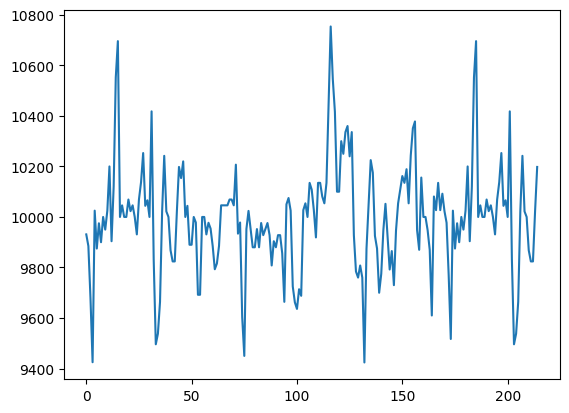

In [107]:
eval_index = 0
eval_env = DummyVecEnv([lambda: LStockDailyEnv(df_evals[eval_index])])
obs = eval_env.reset()

net_worths = []
actions = [Actions.Hold.value] * NEXT_OBSERVATION_SIZE
done, state = False, None
# while not done:

df_evals[eval_index].shape[0]
for _ in range(NEXT_OBSERVATION_SIZE, df_evals[eval_index].shape[0]):
#     print(obs)
    action, state = model.predict(obs, state=state, deterministic=True)
#     print(action)
    obs, reward, done, _info = eval_env.step(action)
    net_worths.append(_info[0]['net_worth'])
    
    actions.append(action[0])
#     eval_env.render()
    
dff = df_evals[eval_index].assign(action=actions)

dff = dff.drop(['open_normal', 'close_normal', 'high_normal', 'low_normal', 'volume_normal', 'amount_normal'], axis=1)

plt.plot(net_worths)
plt.show()

In [98]:
dddf = np.array(ddd)
dddf.shape

(201870, 4)

In [99]:
dddf[:,2][-100:]

array([0., 2., 0., 0., 0., 2., 2., 2., 2., 2., 0., 0., 0., 2., 2., 2., 2.,
       2., 0., 2., 0., 0., 0., 2., 0., 0., 0., 2., 0., 0., 0., 2., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 2., 0., 2., 0., 0., 0., 2., 0., 0., 0.,
       2., 0., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

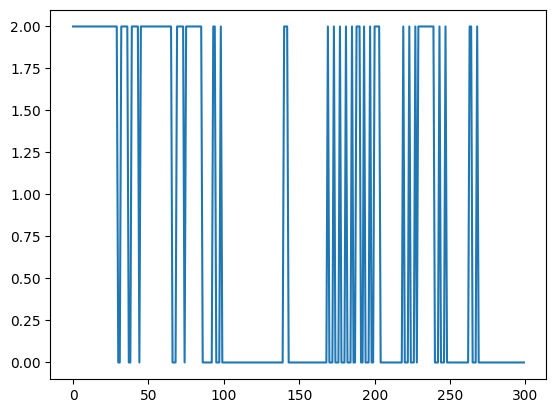

In [66]:
plt.plot(dddf[:,2][-300:]) #, '.')
plt.show()

In [95]:
actions

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [132]:
dff

,open,close,high,low,volume,amount,action
date,,,,,,,
2021-01-04,9.18,9.29,9.30,9.09,4484555.0,41926596.0,0
2021-01-05,9.31,9.32,9.44,9.28,3896723.0,36895040.0,0
2021-01-06,9.26,9.16,9.30,9.11,3874385.0,36067080.0,0
2021-01-07,9.15,8.84,9.15,8.69,5851525.0,52623452.0,0
2021-01-08,8.80,8.91,9.12,8.65,4604155.0,41699760.0,0
...,...,...,...,...,...,...,...
2021-12-01,8.59,8.84,8.88,8.58,5064556.0,44612984.0,0
2021-12-02,8.83,8.83,8.99,8.73,7022528.0,62334724.0,0
2021-12-03,8.95,8.91,9.03,8.79,8345241.0,74558032.0,0


In [104]:
class PandasDataDd(PandasData):
    # Add a 'action' line to the inherited ones from the base class
    lines = ('action',)
    
    # add the parameter to the parameters inherited from the base class
    params = (('action', 7),)

In [105]:
class RLCross(bt.Strategy):
    def __init__(self):
#         self.sma1 = bt.indicators.SMA(self.dnames.d.dd, period=10, plot=False)
#         self.sma2 = bt.indicators.SMA(self.dnames.d.dd, period=20, plot=False)
        
#         self.crossover = bt.indicators.CrossOver(self.sma1, self.sma2)
        pass

    def next(self):
        
        if not self.position:  # not in the market
            if self.data0.action < 1: # if fast crosses slow to the upside
                price = self.data0.close[0]
                cash = self.broker.get_cash()
                share = int(math.floor((cash)/price))
                self.buy()  # enter long
        elif self.data0.action < 2 :  # in the market & cross to the downside
            self.close()


In [106]:
cerebro = bt.Cerebro(oldtrades=True)

feed = PandasDataDd(dataname=dff, action=6)

cerebro.adddata(feed, name='d')
cerebro.addstrategy(RLCross)

cerebro.broker.setcash(10000.0)

cerebro.broker.setcommission(0.0005)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
result = cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 10000.00
Final Portfolio Value: 9994.22


<IPython.core.display.Javascript object>


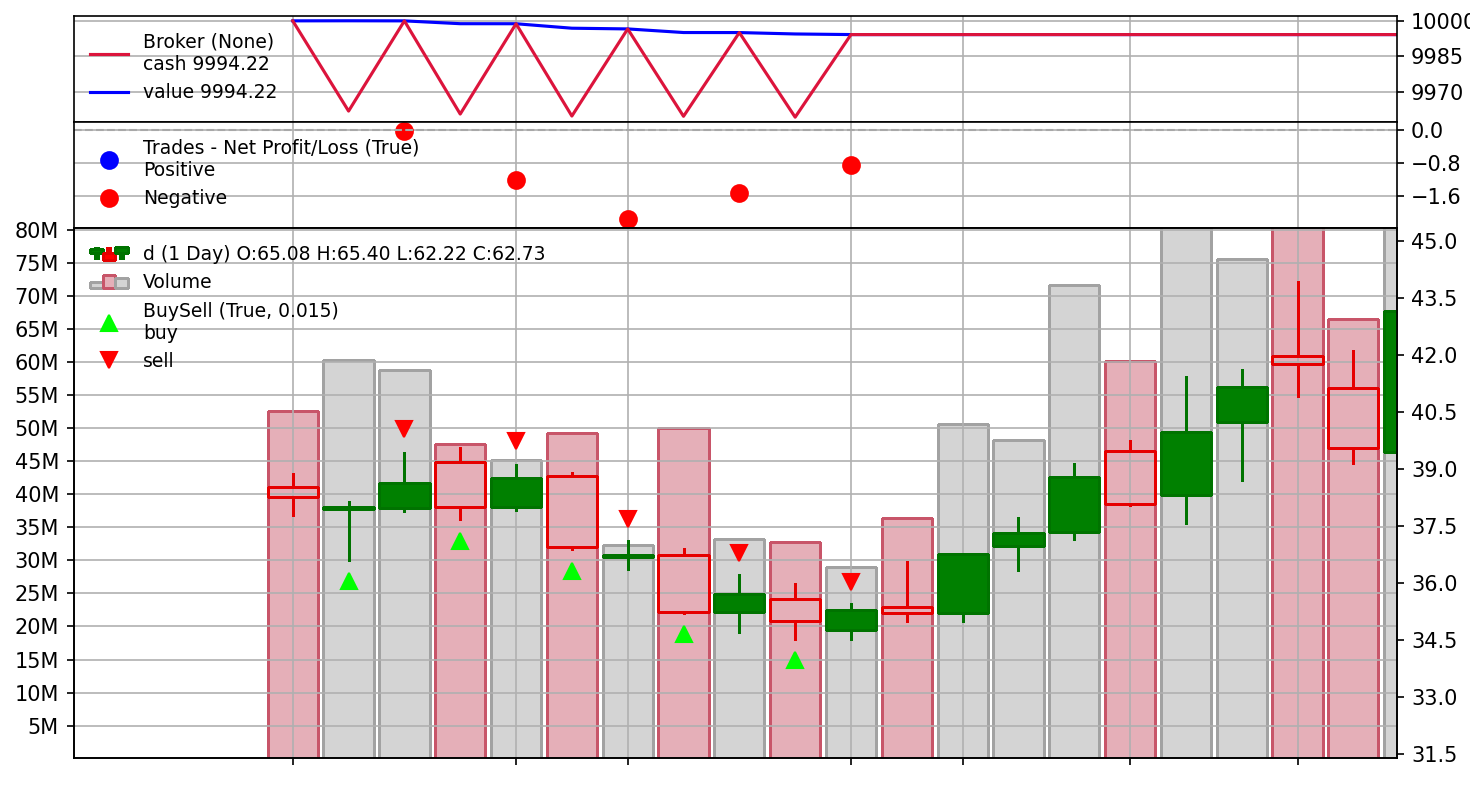

[[<Figure size 640x480 with 4 Axes>]]

In [107]:
cerebro.plot(
    iplot=False,
#     start=datetime.date(2021, 1, 1),
#     end=datetime.date(2021, 11, 24),
    style='candlestick',
    barup='green',
    bardown='red',
    barupfill=True, 
    bardownfill=False,
)